- 데이터셋 분석대상 기간 : <br>
2017-01-01 ~ 2018-08-31 (1년 8개월) <br>


- 출처 : <br>
https://www.kaggle.com/olistbr/brazilian-ecommerce <br>
https://www.kaggle.com/olistbr/marketing-funnel-olist


- 분석 주제 :<br>
 -> Olist 셀러, 판매월, 제품카테고리 중 평균 review_score가 낮은 건들을 확인하고<br>
 -> 해당 계정들에서 공통적으로 관찰되는 문제점을 파악하여 review_score 개선 전략을 세우자
 
 
- 분석 단계 :<br>
 -> 1단계 : 셀러별 월별 매출액, 판매횟수 및 기타 특징을 입력변수로 사용한 군집화 (등급)<br>
 -> 2단계 : 해당 등급 및 기타 특징을 입력변수로 사용한 review_score 예측<br>
 -> 3단계 : review_score에 영향을 미친 요인을 구체적으로 확인하기 위한 워드클라우드 확인

In [650]:
%autosave 0

Autosave disabled


In [651]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 4275-3F4F

 C:\Users\Chanseo Park\Desktop\2차 프로젝트 디렉터리

2021-03-21  오후 05:51    <DIR>          .
2021-03-21  오후 05:51    <DIR>          ..
2021-03-21  오전 02:48    <DIR>          .ipynb_checkpoints
2021-02-16  오전 01:29             2,747 0215 컨설팅.txt
2021-02-24  오후 04:21             4,698 0222 주제후보.txt
2021-02-24  오후 05:53             1,672 0224 컨설팅.txt
2021-03-04  오전 12:43             2,092 0303 컨설팅.txt
2021-03-04  오전 12:43             2,854 0303 특강.txt
2021-03-09  오후 06:56             4,860 0308 컨설팅.txt
2021-03-11  오후 06:15             1,134 0311 논의.txt
2021-03-17  오전 02:25             4,470 0315 논의.txt
2021-03-18  오후 10:08               541 0318 논의.txt
2021-03-11  오후 04:11             1,987 categorizing.csv
2021-03-10  오후 01:49            11,666 categorizing.xlsx
2021-03-15  오전 05:27         2,419,531 cohort_reference.ipynb
2021-03-10  오후 08:25         1,808,761 cyn.ipynb
2021-03-04  오후 07:01         1,686,827 dataset_join.ipynb
2021-03-04  오후 07:01 

In [652]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", -1)

# 데이터셋 불러오기

## olist_sellers_dataset

In [653]:
seller = pd.read_csv('olist_sellers_dataset.csv')
seller.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [654]:
seller.describe(include = 'O')

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,08ad4ac1388e4420ca531c3edfc46198,sao paulo,SP
freq,1,694,1849


In [655]:
seller.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


## olist_order_items_dataset

In [656]:
item = pd.read_csv('olist_order_items_dataset.csv')
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [657]:
item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [658]:
item.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [659]:
item[item['order_item_id'] > 10]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11942,1b15974a0141d54e36626dca3fdc731a,11,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11943,1b15974a0141d54e36626dca3fdc731a,12,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11944,1b15974a0141d54e36626dca3fdc731a,13,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11945,1b15974a0141d54e36626dca3fdc731a,14,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
11946,1b15974a0141d54e36626dca3fdc731a,15,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
...,...,...,...,...,...,...,...
75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44
77085,af822dacd6f5cff7376413c03a388bb7,11,62995b7e571f5760017991632bbfd311,98dac6635aee4995d501a3972e047414,2018-06-13 17:30:35,5.31,15.23
77086,af822dacd6f5cff7376413c03a388bb7,12,62995b7e571f5760017991632bbfd311,98dac6635aee4995d501a3972e047414,2018-06-13 17:30:35,5.31,15.23
84668,c05d6a79e55da72ca780ce90364abed9,11,710b7c26b7a742f497bba45fab91a25f,98dac6635aee4995d501a3972e047414,2018-05-17 13:31:00,21.15,5.54


In [660]:
# 동일 셀러에게 동일 제품을 여러개 주문한 경우, 아래와 같이 나머지 데이터는 모두 같고 order_item_id만 다르게 표시됨
item[item['order_id'] == '1b15974a0141d54e36626dca3fdc731a']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11932,1b15974a0141d54e36626dca3fdc731a,1,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11933,1b15974a0141d54e36626dca3fdc731a,2,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11934,1b15974a0141d54e36626dca3fdc731a,3,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11935,1b15974a0141d54e36626dca3fdc731a,4,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11936,1b15974a0141d54e36626dca3fdc731a,5,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11937,1b15974a0141d54e36626dca3fdc731a,6,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11938,1b15974a0141d54e36626dca3fdc731a,7,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11939,1b15974a0141d54e36626dca3fdc731a,8,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11940,1b15974a0141d54e36626dca3fdc731a,9,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
11941,1b15974a0141d54e36626dca3fdc731a,10,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12


## olist_orders_dataset

In [661]:
order =  pd.read_csv('olist_orders_dataset.csv')
order.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [662]:
order.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,0a5d7e24850c68bf00d39bd62a9a45ee,aeaac9ee4a3514cf3da5f8cb07eeec5f,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [663]:
order.describe(include = 'O')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,0a5d7e24850c68bf00d39bd62a9a45ee,aeaac9ee4a3514cf3da5f8cb07eeec5f,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


## olist_products_dataset

In [664]:
product = pd.read_csv('olist_products_dataset.csv')
product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [665]:
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [666]:
product.describe(include = 'O')

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,961d02e19e9ade3ba8aa028c87b0d8f7,cama_mesa_banho
freq,1,3029


## product_category_name_translation

In [667]:
name = pd.read_csv('product_category_name_translation.csv')
name.head(1)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


8) olist_geolocation_dataset

In [668]:
geo = pd.read_csv('olist_geolocation_dataset.csv')
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## olist_order_reviews_dataset

In [669]:
review = pd.read_csv('olist_order_reviews_dataset.csv')
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


In [670]:
review['review_score'].count()

100000

In [671]:
review.describe(include = 'O')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,11715,41753,100000,100000
unique,99173,99441,4600,36921,637,99010
top,ddc52555ca27b0fe67d5255147682d2d,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,426,230,466,4


## olist_order_payments_dataset

In [672]:
payment = pd.read_csv('olist_order_payments_dataset.csv')
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [673]:
payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [674]:
payment.describe(include = 'O')

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


In [675]:
payment['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher        5775 
debit_card     1529 
not_defined    3    
Name: payment_type, dtype: int64

# EDA 및 데이터 통합

## item 데이터셋 전처리

In [676]:
# price(제품 가격)과 freight_value(배송비)를 더한 'revenue' 컬럼 생성
item['revenue'] = item['price'] + item['freight_value']
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,64.71


In [677]:
# 동일 셀러에게 동일 제품을 여러개 주문한 경우의 데이터 합치기
item = item.groupby(['order_id','product_id','seller_id','shipping_limit_date','price','freight_value']).agg(
    {'order_item_id' : 'count', 'revenue' : 'sum'}).reset_index().rename(columns = {'order_item_id' : 'num'})
item

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71


## seller_id x order_id

### 셀러별 판매건수 확인

In [678]:
# 전체 셀러 : 3095명
seller_order = item.groupby('seller_id')['order_id'].agg('count').sort_values(ascending = False)
seller_order = seller_order.reset_index()
seller_order

,seller_id,order_id
0,6560211a19b47992c3666cc44a7e94c0,1982
1,4a3ca9315b744ce9f8e9374361493884,1889
2,cc419e0650a3c5ba77189a1882b7556a,1720
3,1f50f920176fa81dab994f9023523100,1473
4,da8622b14eb17ae2831f4ac5b9dab84a,1438
...,...,...
3090,75fdd0a732287f9497b179f6bd445d32,1
3091,b9de031b671cd48b28fae9d828cbf2b4,1
3092,24c1de8d9551c0b4fbc53317d53efda8,1
3093,ba8e85df286308fe68a2ce83a8f8b2d6,1


In [679]:
# 판매를 2건 이상 한 셀러 : 2532명
seller_order[seller_order['order_id']>1]

,seller_id,order_id
0,6560211a19b47992c3666cc44a7e94c0,1982
1,4a3ca9315b744ce9f8e9374361493884,1889
2,cc419e0650a3c5ba77189a1882b7556a,1720
3,1f50f920176fa81dab994f9023523100,1473
4,da8622b14eb17ae2831f4ac5b9dab84a,1438
...,...,...
2527,4eeb99008a0f59d2c7759c59f9a346eb,2
2528,63272377184e969942f7fff221be858d,2
2529,78ba5933c21686d1c2f64669c8c459e7,2
2530,6c9875b2f94ba781186f0c1aed8d1687,2


array([[<AxesSubplot:title={'center':'order_id'}>]], dtype=object)

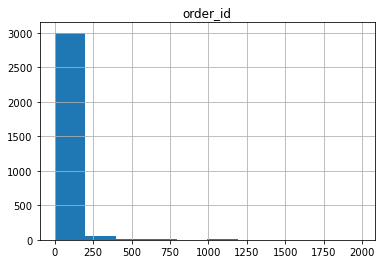

In [680]:
# 전체 셀러 판매건수 분포 확인
seller_order.hist()

array([[<AxesSubplot:title={'center':'order_id'}>]], dtype=object)

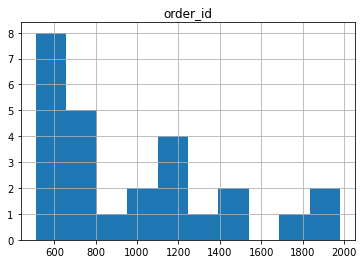

In [681]:
# 판매 건수가 500 이상인 셀러 판매건수 분포 확인
seller_order[seller_order['order_id']>500].hist()

In [682]:
# 전체 셀러 중 2건 이상 판매한 셀러 비율 : 약 81.8%
seller_order[seller_order['order_id']>1].shape[0] / seller_order.shape[0]

0.8180936995153474

### 주문별 판매 아이템수(num) 확인

In [683]:
# order_id별 판매 아이템수(num)는 1~8 사이에 분포
seller_orderitem = item.groupby('order_id')['num'].count().sort_values(ascending = False)
seller_orderitem = seller_orderitem.reset_index()
seller_orderitem

,order_id,num
0,ca3625898fbd48669d50701aba51cd5f,8
1,7d8f5bfd5aff648220374a2df62e84d5,7
2,77df84f9195be22a4e9cb72ca9e8b4c2,7
3,ad850e69fce9a512ada84086651a2e7d,7
4,3990f96693d321ac142fff312bf3706a,6
...,...,...
98661,a9d9773efe0a981195d2861250cff4d9,1
98662,a9d9e48bc0905664f33c53779b5edfb6,1
98663,a9da0d64f6c4dff3f3f383f6b076b24a,1
98664,a9da66f1dfe4cca8956f5e74619c2cb9,1


In [684]:
# 동일 order_id에 다양한 product_id, seller_id가 있는 경우
item[item['order_id']=='ca3625898fbd48669d50701aba51cd5f']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue
80867,ca3625898fbd48669d50701aba51cd5f,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84,1,35.74
80868,ca3625898fbd48669d50701aba51cd5f,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67,2,325.34
80869,ca3625898fbd48669d50701aba51cd5f,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84,1,310.84
80870,ca3625898fbd48669d50701aba51cd5f,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15,1,63.85
80871,ca3625898fbd48669d50701aba51cd5f,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68,2,119.36
80872,ca3625898fbd48669d50701aba51cd5f,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15,1,110.05
80873,ca3625898fbd48669d50701aba51cd5f,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15,1,96.05
80874,ca3625898fbd48669d50701aba51cd5f,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15,1,96.05


In [685]:
# 같은 셀러에게 같은 아이템을 여러개 구매한 경우 아래와 같이 'num' 컬럼에 개수가 표시됨
item[item['order_id']=='428a2f660dc84138d969ccd69a0ab6d5']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue
26550,428a2f660dc84138d969ccd69a0ab6d5,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,15,1225.65


array([[<AxesSubplot:title={'center':'num'}>]], dtype=object)

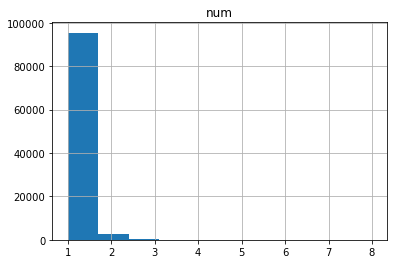

In [686]:
# 주문당 판매 아이템 수 분포 확인
seller_orderitem.hist()

array([[<AxesSubplot:title={'center':'num'}>]], dtype=object)

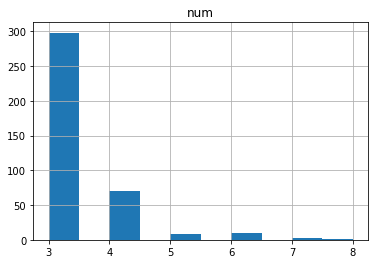

In [687]:
# 주문당 판매 아이템 수가 2 이상인 판매 아이템 수 분포 확인
seller_orderitem[seller_orderitem['num'] > 2].hist()

In [688]:
# 한 order_id에 num 2개 이상인 경우 : 약 3.3%
seller_orderitem[seller_orderitem['num'] > 1].shape[0] / seller_orderitem.shape[0]

0.032797518902154744

## seller_id x revenue

### 셀러별 price, freight_value, revenue 확인

In [689]:
# revenue는 약 12 ~ 249640 BRL (약 2,400 ~ 50,130,000원) 사이에 분포
# revenue는 판매기간에 따라 다르므로 주문건별, 월별 매출로 비교할 필요가 있음
seller_revenue = item.groupby('seller_id')[['price', 'freight_value', 'revenue']].agg('sum').sort_values(by = 'revenue', ascending = False)
seller_revenue

,price,freight_value,revenue
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,227406.24,19938.61,249640.70
7c67e1448b00f6e969d365cea6b010ab,143385.27,38677.08,239536.44
53243585a1d6dc2643021fd1853d8905,208199.61,11750.24,235856.68
4a3ca9315b744ce9f8e9374361493884,191178.72,33209.72,235539.96
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,10042.70,204084.73
...,...,...,...
702835e4b785b67a084280efca355756,7.60,10.96,18.56
4965a7002cca77301c82d3f91b82e1a9,8.49,7.87,16.36
1fa2d3def6adfa70e58c276bb64fe5bb,6.90,9.00,15.90


<AxesSubplot:>

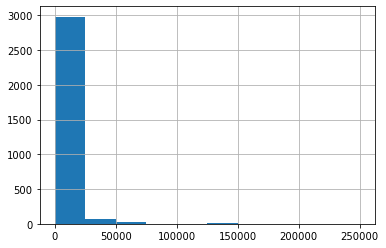

In [690]:
# 셀러별 revenue 분포 확인
seller_revenue['revenue'].hist()

In [691]:
# 셀러별 order_id당 매출은 약12 ~ 6922 BRL (약 2,400 ~ 1,390,000원) 사이에 분포
seller_item_revenue = item.groupby('seller_id')[['order_id', 'revenue']].agg({'order_id' : 'count', 'revenue' : 'sum'})
seller_item_revenue['revenue_per_order'] = seller_item_revenue['revenue'] / seller_item_revenue['order_id']
seller_item_revenue.sort_values(by = 'revenue_per_order', ascending = False)

,order_id,revenue,revenue_per_order
seller_id,,,
80ceebb4ee9b31afb6c6a916a574a1e2,1,6922.21,6922.21
ee27a8f15b1dded4d213a468ba4eb391,1,6726.66,6726.66
b37c4c02bda3161a7546a4e6d222d5b2,4,24487.60,6121.90
585175ec331ea177fa47199e39a6170a,1,3602.47,3602.47
abe021b01ba992245271b9aa422032df,2,6837.24,3418.62
...,...,...,...
702835e4b785b67a084280efca355756,1,18.56,18.56
4965a7002cca77301c82d3f91b82e1a9,1,16.36,16.36
1fa2d3def6adfa70e58c276bb64fe5bb,1,15.90,15.90


array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'revenue_per_order'}>,
        <AxesSubplot:>]], dtype=object)

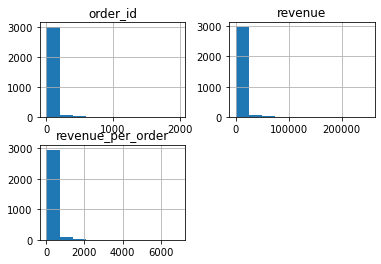

In [692]:
seller_item_revenue.hist()

### ★item, order 데이터셋 합치기

In [693]:
item.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date
count,102425,102425,102425,102425
unique,98666,32951,3095,93318
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-12-07 04:39:05
freq,8,467,1982,7


In [694]:
order.describe(include = 'O')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,0a5d7e24850c68bf00d39bd62a9a45ee,aeaac9ee4a3514cf3da5f8cb07eeec5f,delivered,2018-06-01 13:39:44,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [695]:
item_order = item.merge(order, on = 'order_id', how = 'left')
item_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [696]:
item_order.isnull().sum()

order_id                         0   
product_id                       0   
seller_id                        0   
shipping_limit_date              0   
price                            0   
freight_value                    0   
num                              0   
revenue                          0   
customer_id                      0   
order_status                     0   
order_purchase_timestamp         0   
order_approved_at                14  
order_delivered_carrier_date     1028
order_delivered_customer_date    2230
order_estimated_delivery_date    0   
dtype: int64

In [697]:
# 구매월 컬럼 생성
item_order['purchase_month'] = item_order['order_purchase_timestamp'].str[0:7]
item_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,2018-04
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,2018-07
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,2017-10
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,2017-08


In [698]:
# 셀러별 월매출은 약 10 ~ 67113 BRL (약 2,000 ~ 13,476,000원) 사이에 분포
item_order_month = item_order.groupby(['seller_id', 'purchase_month'])[['order_id', 'revenue']].agg({'order_id' : 'count', 'revenue' : 'sum'})
item_order_month.sort_values(by = 'revenue', ascending = False)

order_id   revenue
seller_id                        purchase_month                    
53243585a1d6dc2643021fd1853d8905 2017-09         83        67113.00
                                 2017-10         49        43332.35
                                 2017-08         34        35787.67
7d13fca15225358621be4086e1eb0964 2018-05         207       33484.81
7c67e1448b00f6e969d365cea6b010ab 2018-03         146       33165.34
...                                              ...            ...
9cea4682e16655f7da87f406902e989e 2017-06         1         12.89   
cf6f6bc4df3999b9c6440f124fb2f687 2017-05         1         12.22   
94b9108d4b637ba65bb4f1e53cfcf8d8 2017-09         1         11.63   
                                 2017-10         1         11.63   
0e44d110fa6a54e121cb2c095a77762f 2017-09         1         10.07   

[16441 rows x 2 columns]

<AxesSubplot:>

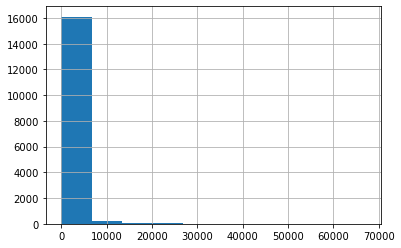

In [699]:
# 셀러별 월 매출 분포 확인
item_order_month['revenue'].hist()

array([[<AxesSubplot:title={'center':'order_id'}>,
        <AxesSubplot:title={'center':'revenue'}>]], dtype=object)

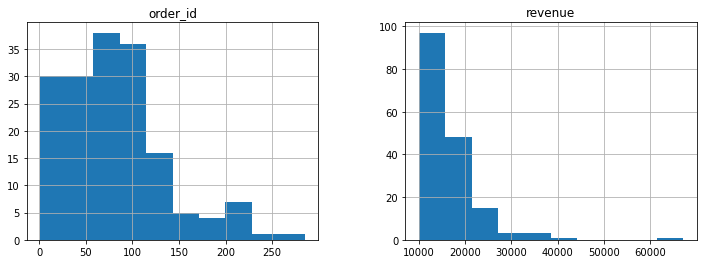

In [700]:
# 셀러별 월 매출이 10000 이상인 경우 월 주문건수, 매출 확인
item_order_month[item_order_month['revenue'] > 10000].hist(figsize = (12,4))

In [701]:
# reset_index
item_order_month = item_order_month.reset_index()
item_order_month

,seller_id,purchase_month,order_id,revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-09,1,916.02
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,2,1832.04
2,001cca7ae9ae17fb1caed9dfb1094831,2017-02,5,1295.40
3,001cca7ae9ae17fb1caed9dfb1094831,2017-03,11,2124.00
4,001cca7ae9ae17fb1caed9dfb1094831,2017-04,14,2243.22
...,...,...,...,...
16436,fffd5413c0700ac820c7069d66d98c89,2018-08,4,624.33
16437,ffff564a4f9085cd26170f4732393726,2016-10,2,146.97
16438,ffff564a4f9085cd26170f4732393726,2017-01,6,327.38
16439,ffff564a4f9085cd26170f4732393726,2017-03,11,1173.24


### 월별 주문수, 매출 기준 셀러 데이터 확인

In [702]:
# 주문수 기준
by_order_id = item_order_month.sort_values(by = 'order_id', ascending = False)
by_order_id = by_order_id.reset_index(drop = True)
by_order_id

,seller_id,purchase_month,order_id,revenue
0,1f50f920176fa81dab994f9023523100,2017-11,285,25534.97
1,955fee9216a65b617aa5c0531780ce60,2018-01,230,21668.92
2,7d13fca15225358621be4086e1eb0964,2018-05,207,33484.81
3,955fee9216a65b617aa5c0531780ce60,2018-04,206,25657.73
4,6560211a19b47992c3666cc44a7e94c0,2018-07,205,16772.21
...,...,...,...,...
16436,7bb8fac2913a6064ec412e583c6d8b4d,2018-02,1,125.52
16437,7bac63f6603d382cc8d0832eb6c100a8,2018-08,1,599.26
16438,7bac63f6603d382cc8d0832eb6c100a8,2018-01,1,418.04
16439,7bac63f6603d382cc8d0832eb6c100a8,2017-12,1,43.33


In [703]:
# 매출액 기준
by_revenue = item_order_month.sort_values(by = 'revenue', ascending = False)
by_revenue = by_revenue.reset_index(drop = True)
by_revenue

,seller_id,purchase_month,order_id,revenue
0,53243585a1d6dc2643021fd1853d8905,2017-09,83,67113.00
1,53243585a1d6dc2643021fd1853d8905,2017-10,49,43332.35
2,53243585a1d6dc2643021fd1853d8905,2017-08,34,35787.67
3,7d13fca15225358621be4086e1eb0964,2018-05,207,33484.81
4,7c67e1448b00f6e969d365cea6b010ab,2018-03,146,33165.34
...,...,...,...,...
16436,9cea4682e16655f7da87f406902e989e,2017-06,1,12.89
16437,cf6f6bc4df3999b9c6440f124fb2f687,2017-05,1,12.22
16438,94b9108d4b637ba65bb4f1e53cfcf8d8,2017-09,1,11.63
16439,94b9108d4b637ba65bb4f1e53cfcf8d8,2017-10,1,11.63


## product_category

### ★product, name, category 데이터셋 합치기

In [704]:
# product_category_name 컬럼의 포르투갈어를 영어와 매칭하기 위해 product, name 데이터셋 합치기 
prod = product.merge(name, how = 'outer', on = 'product_category_name')
prod.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [705]:
# product_category_name_english에 product_category_name에 있는 단어 2개가 빠져있음을 확인 (뒤에서 대체)
prod.describe(include = 'O')

,product_id,product_category_name,product_category_name_english
count,32951,32341,32328
unique,32951,73,71
top,961d02e19e9ade3ba8aa028c87b0d8f7,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


In [706]:
# 영문상품명 데이터에 'food_drink','food', 'drinks' 등 겹치는 카테고리가 있음을 확인
prod['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

In [707]:
# 겹치는 카테고리 재분류한 영문상품명 데이터가 저장된 category 파일 불러와 prod와 합치기
category = pd.read_csv('categorizing.csv', names = ['product_category_name_english', 'new_category'])
prod_rename = prod.merge(category, on = 'product_category_name_english', how = 'outer')
prod_rename.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,beauty
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,beauty


###  ★product_category_english_name 없는 데이터 처리

In [708]:
# 포르투갈어, 영문명 상품정보가 모두 없는 데이터는 제거
prod_rename = prod_rename[~prod_rename['product_category_name'].isnull()]
prod_rename

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,beauty
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,beauty
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery,beauty
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery,beauty
...,...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery,furniture
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery,furniture
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery,furniture
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery,furniture


In [709]:
# 상품명 정보가 포르투갈어로만 존재하는 데이터 확인
prod_rename.loc[prod_rename['new_category'].isnull(), 'product_category_name']

30214    pc_gamer                                     
30215    pc_gamer                                     
30216    pc_gamer                                     
30217    portateis_cozinha_e_preparadores_de_alimentos
30218    portateis_cozinha_e_preparadores_de_alimentos
30219    portateis_cozinha_e_preparadores_de_alimentos
30220    portateis_cozinha_e_preparadores_de_alimentos
30221    portateis_cozinha_e_preparadores_de_alimentos
30222    portateis_cozinha_e_preparadores_de_alimentos
30223    portateis_cozinha_e_preparadores_de_alimentos
30224    portateis_cozinha_e_preparadores_de_alimentos
30225    portateis_cozinha_e_preparadores_de_alimentos
30226    portateis_cozinha_e_preparadores_de_alimentos
Name: product_category_name, dtype: object

In [710]:
# 재분류한 영문상품명 중 해당하는 카테고리명 할당
prod_rename.loc[(prod_rename['new_category'].isnull()) & (prod_rename['product_category_name'] == 'pc_gamer'),
           'new_category'] = 'games'
prod_rename.loc[(prod_rename['new_category'].isnull()) & (prod_rename['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'),
           'new_category'] = 'home_living'

### ★prod_rename, item 데이터셋 합치기

In [711]:
prod_order = item.merge(prod_rename, how = 'left', on = 'product_id')
prod_order.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,pet
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,furniture
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,garden_tools


In [712]:
prod_order.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english,new_category
count,102425,102425,102425,102425,100965,100943,100965
unique,98666,32951,3095,93318,73,71,21
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-12-07 04:39:05,cama_mesa_banho,bed_bath_table,stationery
freq,8,467,1982,7,10160,10160,17037


In [713]:
prod_order.isnull().sum()

order_id                         0   
product_id                       0   
seller_id                        0   
shipping_limit_date              0   
price                            0   
freight_value                    0   
num                              0   
revenue                          0   
product_category_name            1460
product_name_lenght              1460
product_description_lenght       1460
product_photos_qty               1460
product_weight_g                 1461
product_length_cm                1461
product_height_cm                1461
product_width_cm                 1461
product_category_name_english    1482
new_category                     1460
dtype: int64

In [714]:
# 포르투갈어, 영문명 상품정보가 모두 없는 데이터 제외
prod_order = prod_order[~prod_order['product_category_name'].isnull()]
prod_order

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,pet
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,furniture
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,beauty
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,home_appliances
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,electronics
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,sports
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,electronics


In [715]:
# 전체 판매제품 중 가장 많이 팔린 카테고리 제품 보기
prod_order_sorted = prod_order.groupby('new_category')['product_category_name'].agg('count').sort_values(ascending = False)
popular_prod = prod_order_sorted.head(30).to_frame()
popular_prod

,product_category_name
new_category,
stationery,17037
beauty,12264
home_living,10879
electronics,10316
furniture,8647
sports,7858
home_appliances,7725
telephone,4504
auto,3991


<AxesSubplot:xlabel='new_category', ylabel='product_category_name'>

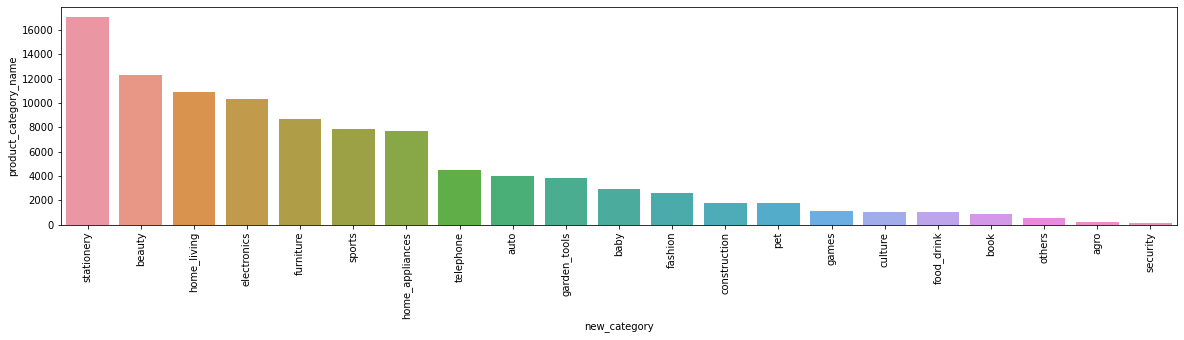

In [716]:
plt.figure(figsize=(20, 4))
plt.xticks(rotation = 90)

sns.barplot(data = popular_prod, x = popular_prod.index, y = 'product_category_name')

In [717]:
# 판매건수 기준 Top1 seller 판매제품 카테고리
prod_order[prod_order['seller_id'] == '6560211a19b47992c3666cc44a7e94c0'].groupby(
    'new_category')['product_category_name'].agg('count').sort_values(ascending = False)

new_category
stationery      1585
fashion         336 
electronics     42  
beauty          11  
sports          7   
construction    1   
Name: product_category_name, dtype: int64

In [718]:
# 판매금액 기준 Top1 seller 판매제품 카테고리
prod_order[prod_order['seller_id'] == '4869f7a5dfa277a7dca6462dcf3b52b2'].groupby(
    'new_category')['product_category_name'].agg('count').sort_values(ascending = False)

new_category
stationery     1043
electronics    68  
beauty         20  
games          7   
telephone      3   
sports         1   
auto           1   
Name: product_category_name, dtype: int64

## review_score

### ★item_order, review 데이터셋 합치기

In [719]:
# item_order 데이터 확인
item_order.head(1)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09


In [720]:
item_order.describe()

,price,freight_value,num,revenue
count,102425.000000,102425.000000,102425.000000,102425.000000
mean,124.422006,20.111152,1.099829,154.684435
std,188.926084,15.884700,0.456926,214.501057
min,0.850000,0.000000,1.000000,7.280000
25%,40.000000,13.140000,1.000000,60.000000
50%,78.800000,16.320000,1.000000,101.600000
75%,139.000000,21.220000,1.000000,170.190000
max,6735.000000,409.680000,20.000000,13664.080000


In [721]:
item_order.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month
count,102425,102425,102425,102425,102425,102425,102425,102411,101397,100195,102425,102425
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,24
top,ca3625898fbd48669d50701aba51cd5f,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-12-07 04:39:05,0d861a5e4dd6a9079d89e1330848f0ab,delivered,2018-08-12 02:11:20,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-08-21 12:18:48,2017-12-20 00:00:00,2017-11
freq,8,467,1982,7,8,100196,8,9,47,8,541,7782


In [722]:
# review 데이터 확인
review.head(1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [723]:
review.describe(include = 'O')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,11715,41753,100000,100000
unique,99173,99441,4600,36921,637,99010
top,ddc52555ca27b0fe67d5255147682d2d,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,426,230,466,4


In [724]:
# item_order와 review 데이터셋 합치기
item_order_review = item_order.merge(review, how = 'outer', on = 'order_id')
item_order_review.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [725]:
item_order_review.describe()

,price,freight_value,num,revenue,review_score
count,103035.000000,103035.000000,103035.000000,103035.000000,103813.000000
mean,124.236486,20.100675,1.099840,154.484573,4.043232
std,188.564473,15.861700,0.456909,214.092278,1.380441
min,0.850000,0.000000,1.000000,7.280000,1.000000
25%,40.000000,13.140000,1.000000,59.920000,4.000000
50%,78.000000,16.320000,1.000000,101.340000,5.000000
75%,139.000000,21.200000,1.000000,169.985000,5.000000
max,6735.000000,409.680000,20.000000,13664.080000,5.000000


In [726]:
item_order_review.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,103813,103035,103035,103035,103035,103035,103035,103021,101998,100784,103035,103035,103813,12304,43905,103813,103813
unique,99441,32951,3095,93318,98666,7,98112,90174,81017,95664,450,24,99173,4600,36921,637,99010
top,5a3b1c29a49756e75f1ef513383c0c12,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,2017-11,b8017a9ca639f71a9a4a745985f4a729,Recomendo,Muito bom,2017-12-19 00:00:00,2018-08-24 17:07:04
freq,12,470,1988,12,12,100785,12,12,47,12,547,7841,8,439,236,478,8


### ★seller_id 없는 데이터 제거

In [727]:
item_order_review.isnull().sum()

order_id                         0    
product_id                       778  
seller_id                        778  
shipping_limit_date              778  
price                            778  
freight_value                    778  
num                              778  
revenue                          778  
customer_id                      778  
order_status                     778  
order_purchase_timestamp         778  
order_approved_at                792  
order_delivered_carrier_date     1815 
order_delivered_customer_date    3029 
order_estimated_delivery_date    778  
purchase_month                   778  
review_id                        0    
review_score                     0    
review_comment_title             91509
review_comment_message           59908
review_creation_date             0    
review_answer_timestamp          0    
dtype: int64

In [728]:
# item 데이터셋에는 없고 order, review 데이터셋에만 정보가 있는 아래 데이터를 살펴보면
# order_status가 delivered가 아닌 경우의 데이터가 order, review에 추가로 포함된 경우가 있는 것으로 파악됨
item[item['order_id']=='f62f01ec64c6b221f926ba560907d8f7']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue


In [729]:
order[order['order_id']=='f62f01ec64c6b221f926ba560907d8f7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
64186,f62f01ec64c6b221f926ba560907d8f7,a35ef57cd99a99e77e58316ab0cc2927,unavailable,2017-02-14 20:55:49,2017-02-14 21:05:27,NaN,NaN,2017-04-03 00:00:00


In [730]:
# 해당 건들은 item 데이터셋에 정보가 없어 seller_id, price, freight_value 등 주요 정보가 확인되지 않으므로 분석에서 제외
item_order_review = item_order_review[~item_order_review['seller_id'].isnull()]
item_order_review.head()

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,2017-04,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,2018-01,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,2018-08,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,2017-02,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [731]:
item_order_review.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,103035,103035,103035,103035,103035,103035,103035,103021,101998,100784,103035,103035,103035,12212,43362,103035,103035
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,24,98453,4569,36435,634,98291
top,5a3b1c29a49756e75f1ef513383c0c12,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,2017-11,b8017a9ca639f71a9a4a745985f4a729,Recomendo,Muito bom,2017-12-19 00:00:00,2018-08-24 17:07:04
freq,12,470,1988,12,12,100785,12,12,47,12,547,7841,8,439,236,473,8


In [732]:
item_order_review.isnull().sum()

order_id                         0    
product_id                       0    
seller_id                        0    
shipping_limit_date              0    
price                            0    
freight_value                    0    
num                              0    
revenue                          0    
customer_id                      0    
order_status                     0    
order_purchase_timestamp         0    
order_approved_at                14   
order_delivered_carrier_date     1037 
order_delivered_customer_date    2251 
order_estimated_delivery_date    0    
purchase_month                   0    
review_id                        0    
review_score                     0    
review_comment_title             90823
review_comment_message           59673
review_creation_date             0    
review_answer_timestamp          0    
dtype: int64

### ★item_order_review, prod_order 합치기

In [733]:
item_order_review.head(1)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03


In [734]:
item_order_review.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,103035,103035,103035,103035,103035,103035,103035,103021,101998,100784,103035,103035,103035,12212,43362,103035,103035
unique,98666,32951,3095,93318,98666,7,98112,90174,81017,95664,450,24,98453,4569,36435,634,98291
top,5a3b1c29a49756e75f1ef513383c0c12,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,2017-11,b8017a9ca639f71a9a4a745985f4a729,Recomendo,Muito bom,2017-12-19 00:00:00,2018-08-24 17:07:04
freq,12,470,1988,12,12,100785,12,12,47,12,547,7841,8,439,236,473,8


In [735]:
prod_rename.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,beauty


In [736]:
prod_rename.describe(include = 'O')

,product_id,product_category_name,product_category_name_english,new_category
count,32341,32341,32328,32341
unique,32341,73,71,21
top,961d02e19e9ade3ba8aa028c87b0d8f7,cama_mesa_banho,bed_bath_table,stationery
freq,1,3029,3029,4818


In [737]:
df = item_order_review.merge(prod_rename, on = 'product_id', how = 'inner')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-06,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1.0,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1.0,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1.0,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,1.0,181.10,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,2018-07,d8b7a27e0ca2736c310d24a87bcba62a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 00:25:51,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools,garden_tools
101562,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,1.0,112.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,2018-08-18 10:10:11,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00,2018-08,4e78f83fed69a70a3eb2796a9f24b368,4,NaN,NaN,2018-08-22 00:00:00,2018-08-25 14:22:54,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,30.0,20.0,furniture_decor,furniture
1015

## geolocation

### ★한 zipcode에 여러 state명 있는 경우

In [738]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [739]:
# zipcode별로 state 개수 확인
zip_code = geo[["geolocation_zip_code_prefix","geolocation_state"]].drop_duplicates().groupby(
    ["geolocation_zip_code_prefix"]).geolocation_state.count().sort_values().reset_index()
zip_code

,geolocation_zip_code_prefix,geolocation_state
0,1001,1
1,62010,1
2,62000,1
3,61979,1
4,61962,1
...,...,...
19010,79750,2
19011,2116,2
19012,80630,2
19013,4011,2


In [740]:
# zipcode별 state가 2개인 데이터 확인
zipcode = zip_code[zip_code.geolocation_state > 1].geolocation_zip_code_prefix.tolist()
zipcode

[23056, 78557, 21550, 79750, 2116, 80630, 4011, 72915]

In [741]:
# 위 데이터는 모두 1건씩 다른 state 정보가 잘못 들어간 경우로 파악됨
geo[geo['geolocation_zip_code_prefix']==72915].groupby(
    "geolocation_state")['geolocation_zip_code_prefix'].count().sort_values()

geolocation_state
DF    1 
GO    40
Name: geolocation_zip_code_prefix, dtype: int64

In [742]:
# 가장 많이 등록된 state로 대체
for loc in zipcode:
    set_states = geo[geo['geolocation_zip_code_prefix']==loc].groupby(
        "geolocation_state")['geolocation_zip_code_prefix'].count().sort_values().index[-1]
    geo.loc[geo['geolocation_zip_code_prefix']==loc, "geolocation_state"] = set_states

In [743]:
zip_code = geo[["geolocation_zip_code_prefix","geolocation_state"]].drop_duplicates().groupby(
    ["geolocation_zip_code_prefix"]).geolocation_state.count().sort_values().reset_index()
zip_code

,geolocation_zip_code_prefix,geolocation_state
0,1001,1
1,62014,1
2,62011,1
3,62010,1
4,62000,1
...,...,...
19010,19908,1
19011,19907,1
19012,19906,1
19013,19904,1


In [744]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [745]:
# zipcode별 state가 2개 이상인 데이터 확인
zipcode_seller = seller[["seller_zip_code_prefix","seller_state"]].drop_duplicates().groupby(
    ["seller_zip_code_prefix"])['seller_state'].count().sort_values().reset_index()
zipcode_seller

,seller_zip_code_prefix,seller_state
0,1001,1
1,31110,1
2,31050,1
3,31035,1
4,31030,1
...,...,...
2241,95076,2
2242,22783,2
2243,81020,2
2244,81560,2


In [746]:
# 위 데이터는 각각 다른 state명이 1건씩 들어가 있어, 어떤 정보가 정확한지 판단하기 어려움
# geo, seller 데이터셋 통합시에는 zip_code 기준으로 진행하고, state명은 geo 데이터셋의 정보 기준으로 진행키로 함
seller[seller['seller_zip_code_prefix']==85960].groupby(
    "seller_state")['seller_zip_code_prefix'].count().sort_values()

seller_state
PA    1
PR    1
SP    1
Name: seller_zip_code_prefix, dtype: int64

### ★geo, seller, df 데이터셋 합치기

In [747]:
# 불필요 컬럼 삭제
geo = geo.drop(['geolocation_lat', 'geolocation_lng', 'geolocation_city'], axis = 1)
geo.head()

,geolocation_zip_code_prefix,geolocation_state
0,1037,SP
1,1046,SP
2,1046,SP
3,1041,SP
4,1035,SP


In [748]:
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [749]:
# seller 데이터셋의 zipcode 중 geo에 없는 경우 확인
seller_zipcode_list = set(seller['seller_zip_code_prefix']) - set(geo['geolocation_zip_code_prefix'])
seller_zipcode_list

{2285, 7412, 37708, 71551, 72580, 82040, 91901}

In [750]:
# 해당 데이터만 따로 저장
seller_unique_zipcode = seller.loc[seller['seller_zip_code_prefix'].isin(seller_zipcode_list),
                                   ['seller_zip_code_prefix', 'seller_state']].rename(columns = {
    'seller_zip_code_prefix' : 'geolocation_zip_code_prefix', 'seller_state' : 'geolocation_state'}).reset_index(drop = True)
seller_unique_zipcode

,geolocation_zip_code_prefix,geolocation_state
0,82040,PR
1,91901,RS
2,72580,DF
3,2285,SP
4,7412,SP
5,71551,DF
6,37708,MG


In [751]:
geo_full = pd.concat([geo, seller_unique_zipcode], axis = 0)
geo_full

,geolocation_zip_code_prefix,geolocation_state
0,1037,SP
1,1046,SP
2,1046,SP
3,1041,SP
4,1035,SP
...,...,...
2,72580,DF
3,2285,SP
4,7412,SP
5,71551,DF


In [752]:
seller_geo = seller.merge(geo_full, left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix', how = 'left').drop_duplicates()
seller_geo

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,SP
80,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,13844,SP
183,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,20031,RJ
570,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4195,SP
745,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,12914,SP
...,...,...,...,...,...,...
434713,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,87111,PR
434781,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,88137,SC
434860,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,4650,SP
434928,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,96080,RS


In [753]:
seller_geo = seller_geo.drop(['seller_zip_code_prefix', 'seller_city', 'seller_state', 'geolocation_zip_code_prefix'], axis = 1)
seller_geo

,seller_id,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,SP
80,d1b65fc7debc3361ea86b5f14c68d2e2,SP
183,ce3ad9de960102d0677a81f5d0bb7b2d,RJ
570,c0f3eea2e14555b6faeea3dd58c1b1c3,SP
745,51a04a8a6bdcb23deccc82b0b80742cf,SP
...,...,...
434713,98dddbc4601dd4443ca174359b237166,PR
434781,f8201cab383e484733266d1906e2fdfa,SC
434860,74871d19219c7d518d0090283e03c137,SP
434928,e603cf3fec55f8697c9059638d6c8eb5,RS


In [754]:
# df 데이터셋과 합치기
df = df.merge(seller_geo, on = 'seller_id', how = 'left')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-06,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1.0,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1.0,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1.0,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,1.0,181.10,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,2018-07,d8b7a27e0ca2736c310d24a87bcba62a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 00:25:51,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools,garden_tools,RS
101562,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,1.0,112.52,11e0f43ab4e2d2c48348dd9332c0ef80,delivered,2018-08-18 10:00:59,2018-08-18 10:10:11,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00,2018-08,4e78f83fed69a70a3eb2796a9f24b368,4,NaN,NaN,2018-08-22 00:00:00,2018-08-25 14:22:54,moveis_decoracao,30.0,308.0,1.0,2300.0,37.0,

## payment

In [755]:
payment[(payment['payment_installments'] > 1) & (payment['payment_sequential'] > 1)]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
199,332c6742772f2df936696b6512b10edb,2,credit_card,6,134.55
949,98f0e2b0d85754ca3b4e06d70f0f63a2,2,credit_card,2,70.00
2191,510bff1cf06be1143d3b6698df2fd486,2,credit_card,8,406.38
2231,1590f37cad06b14cb123f6a45b2bdf4c,2,credit_card,5,53.65
2632,253bf86c38be4d6ffa40eb641a356d69,2,credit_card,3,31.68
...,...,...,...,...,...
102295,c75e9a685439f75e990bcf13443f02c5,2,credit_card,4,497.54
102341,407cc9b2c7575dbff71cb23b6cc26814,2,credit_card,7,76.39
102674,ef13a698cf88c9e17ccca0261e0b9e7a,2,credit_card,8,94.49
102724,55adc5cef9556477770f0b858669f8fc,2,credit_card,2,65.55


In [756]:
# 19개의 결제수단, 1개월 할부로 구매한 경우
payment[payment['order_id'] == 'fedcd9f7ccdc8cba3a18defedd1a5547']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
7548,fedcd9f7ccdc8cba3a18defedd1a5547,15,voucher,1,10.66
9665,fedcd9f7ccdc8cba3a18defedd1a5547,1,credit_card,1,1.67
14352,fedcd9f7ccdc8cba3a18defedd1a5547,9,voucher,1,5.30
15264,fedcd9f7ccdc8cba3a18defedd1a5547,11,voucher,1,8.42
15930,fedcd9f7ccdc8cba3a18defedd1a5547,8,voucher,1,31.43
18175,fedcd9f7ccdc8cba3a18defedd1a5547,14,voucher,1,7.63
27087,fedcd9f7ccdc8cba3a18defedd1a5547,2,voucher,1,7.76
32396,fedcd9f7ccdc8cba3a18defedd1a5547,13,voucher,1,5.84
35657,fedcd9f7ccdc8cba3a18defedd1a5547,19,voucher,1,8.42
36869,fedcd9f7ccdc8cba3a18defedd1a5547,5,voucher,1,9.76


In [757]:
# 2개의 결제수단, 4개월 할부로 구매한 경우
payment[payment['order_id'] == 'c75e9a685439f75e990bcf13443f02c5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19596,c75e9a685439f75e990bcf13443f02c5,1,credit_card,4,500.00
102295,c75e9a685439f75e990bcf13443f02c5,2,credit_card,4,497.54


In [758]:
# groupby를 위해 payment_type 컬럼 원핫인코딩
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
payment_type = pd.DataFrame(payment['payment_type'])
ohe_payment = ohe.fit_transform(payment_type)

In [759]:
ohe.categories_

[array(['boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher'],
       dtype=object)]

In [760]:
ohe_columns = []

for cat in ohe.categories_:
    ohe_columns += cat.tolist()

payment_type = pd.DataFrame(ohe_payment, columns=ohe_columns)
payment_type

,boleto,credit_card,debit_card,not_defined,voucher
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
103881,1.0,0.0,0.0,0.0,0.0
103882,0.0,1.0,0.0,0.0,0.0
103883,0.0,1.0,0.0,0.0,0.0
103884,0.0,1.0,0.0,0.0,0.0


In [761]:
payment = payment.reset_index(drop = True)
payment = pd.concat([payment, payment_type], axis=1).drop(columns='payment_type')
payment

,order_id,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,1,8,99.33,0.0,1.0,0.0,0.0,0.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,1,24.39,0.0,1.0,0.0,0.0,0.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,1,65.71,0.0,1.0,0.0,0.0,0.0
3,ba78997921bbcdc1373bb41e913ab953,1,8,107.78,0.0,1.0,0.0,0.0,0.0
4,42fdf880ba16b47b59251dd489d4441a,1,2,128.45,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,1,363.31,1.0,0.0,0.0,0.0,0.0
103882,7b905861d7c825891d6347454ea7863f,1,2,96.80,0.0,1.0,0.0,0.0,0.0
103883,32609bbb3dd69b3c066a6860554a77bf,1,1,47.77,0.0,1.0,0.0,0.0,0.0
103884,b8b61059626efa996a60be9bb9320e10,1,5,369.54,0.0,1.0,0.0,0.0,0.0


In [762]:
# order_id 기준으로 groupby
payment_grouped = payment.groupby('order_id')[['payment_sequential', 'payment_installments', 'payment_value',
                                              'boleto','credit_card','debit_card','not_defined','voucher']].agg({
    'payment_sequential' : 'max',
    'payment_installments' : 'max',
    'payment_value' : 'sum',
    'boleto' : 'sum',
    'credit_card': 'sum',
    'debit_card': 'sum',
    'not_defined': 'sum',
    'voucher': 'sum'
})

In [763]:
payment_grouped.describe()

,payment_sequential,payment_installments,payment_value,boleto,credit_card,debit_card,not_defined,voucher
count,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000,99440.000000
mean,1.045515,2.930521,160.990267,0.198954,0.772275,0.015376,0.000030,0.058075
std,0.382177,2.715685,221.951257,0.399215,0.426264,0.123126,0.005493,0.421513
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,62.010000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,105.290000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,176.970000,0.000000,1.000000,0.000000,0.000000,0.000000
max,29.000000,24.000000,13664.080000,1.000000,2.000000,2.000000,1.000000,29.000000


In [764]:
payment_grouped = payment_grouped.drop('payment_value', axis = 1).reset_index()
payment_grouped

,order_id,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,0.0,1.0,0.0,0.0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,3,0.0,1.0,0.0,0.0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,5,0.0,1.0,0.0,0.0,0.0
3,00024acbcdf0a6daa1e931b038114c75,1,2,0.0,1.0,0.0,0.0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1,1,1.0,0.0,0.0,0.0,0.0
99436,fffcd46ef2263f404302a634eb57f7eb,1,1,1.0,0.0,0.0,0.0,0.0
99437,fffce4705a9662cd70adb13d4a31832d,1,3,0.0,1.0,0.0,0.0,0.0
99438,fffe18544ffabc95dfada21779c9644f,1,3,0.0,1.0,0.0,0.0,0.0


### ★payment_grouped, df 데이터셋 합치기

In [765]:
df.describe(include = 'O')

,order_id,product_id,seller_id,shipping_limit_date,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,new_category,geolocation_state
count,101566,101566,101566,101566,101566,101566,101566,101553,100563,99375,101566,101566,101566,12142,42716,101566,101566,101566,101544,101566,101566
unique,97277,32341,3035,92070,97277,7,96742,88976,79813,94356,450,24,97075,4552,35919,634,96919,73,71,21,22
top,5a3b1c29a49756e75f1ef513383c0c12,99a4788cb24856965c36a24e339b6058,6560211a19b47992c3666cc44a7e94c0,2017-10-24 13:06:21,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-17 13:06:29,2017-10-18 13:06:21,2018-05-09 15:48:00,2017-10-22 14:43:54,2017-12-20 00:00:00,2017-11,b8017a9ca639f71a9a4a745985f4a729,Recomendo,Muito bom,2018-08-28 00:00:00,2018-08-24 17:07:04,cama_mesa_banho,bed_bath_table,stationery,SP
freq,12,470,1988,12,12,99376,12,12,47,12,544,7726,8,434,230,464,8,10297,10297,17073,71618


In [766]:
df = df.merge(payment_grouped, on = 'order_id', how = 'left')
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-06,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1.0,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1.0,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1.0,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,1.0,181.10,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,2018-07,d8b7a27e0ca2736c310d24a87bcba62a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 00:25:51,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0
101562,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,1.0

In [767]:
df.isnull().sum()

order_id                         0    
product_id                       0    
seller_id                        0    
shipping_limit_date              0    
price                            0    
freight_value                    0    
num                              0    
revenue                          0    
customer_id                      0    
order_status                     0    
order_purchase_timestamp         0    
order_approved_at                13   
order_delivered_carrier_date     1003 
order_delivered_customer_date    2191 
order_estimated_delivery_date    0    
purchase_month                   0    
review_id                        0    
review_score                     0    
review_comment_title             89424
review_comment_message           58850
review_creation_date             0    
review_answer_timestamp          0    
product_category_name            0    
product_name_lenght              0    
product_description_lenght       0    
product_photos_qty       

## 분석대상 재설정
### ★한 order_id에 여러 seller_id, product_id 있는 경우

In [768]:
check_orderitem = df.groupby('order_id')['seller_id', 'product_id'].agg('count').reset_index()
check_orderitem = check_orderitem[check_orderitem['seller_id']>1]
check_orderitem

,order_id,seller_id,product_id
73,002f98c0f7efd42638ed6100ca699b42,2,2
82,00337fe25a3780b3424d9ad7c5a4b35e,2,2
85,0035246a40f520710769010f752e7507,2,2
130,005d9a5423d47281ac463a968b3936fb,2,2
193,00946f674d880be1f188abc10ad7cf46,2,2
...,...,...,...
97166,ffb18bf111fa70edf316eb0390427986,2,2
97174,ffb8f7de8940249a3221252818937ecb,3,3
97175,ffb9a9cd00c74c11c24aa30b3d78e03b,3,3
97186,ffc16cecff8dc037f60458f28d1c1ba5,2,2


In [769]:
df[df['order_id']=='0245631f7bd55dbee7c6b441629bba94']

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
16899,0245631f7bd55dbee7c6b441629bba94,2b10e945dae5434075c8bb2be0d17325,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,279.9,30.84,1.0,310.74,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,233.0,1.0,2950.0,46.0,8.0,38.0,bed_bath_table,home_living,SP,1.0,8.0,0.0,1.0,0.0,0.0,0.0
16902,0245631f7bd55dbee7c6b441629bba94,372645c7439f9661fbbacfd129aa92ec,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,119.9,13.13,1.0,133.03,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,236.0,1.0,1500.0,34.0,7.0,32.0,bed_bath_table,home_living,SP,1.0,8.0,0.0,1.0,0.0,0.0,0.0
16925,0245631f7bd55dbee7c6b441629bba94,525947dbe3304ac32bf51602f9557c12,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,119.9,12.33,1.0,132.23,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,236.0,1.0,2600.0,34.0,7.0,32.0,bed_bath_table,home_living,SP,1.0,8.0,0.0,1.0,0.0,0.0,0.0
16935,0245631f7bd55dbee7c6b441629bba94,eb53f94fdc60278efcef123bb275658a,da8622b14eb17ae2831f4ac5b9dab84a,2017-10-11 18:45:20,329.9,33.82,1.0,363.72,4d82e79f5404e8c3f059ab099fbe5dda,delivered,2017-10-05 18:26:36,2017-10-05 18:45:20,2017-10-06 19:48:55,2017-10-13 21:37:42,2017-11-01 00:00:00,2017-10,2cb679cfffd69784ae97b7f48293f6bd,2,NaN,"Essa cortina não veio com as demais:Cortina Voil Branca 8,00x2,80 Forro Microfibra Ilhós Cromado Branco",2017-10-14 00:00:00,2017-10-15 20:03:59,cama_mesa_banho,60.0,270.0,1.0,3400.0,39.0,13.0,46.0,bed_bath_table,home_living,SP,1.0,8.0,0.0,1.0,0.0,0.0,0.0


In [770]:
check_orderitem_index = check_orderitem['order_id'].tolist()

In [771]:
# 해당 데이터는 어떤 셀러, 어떤 제품때문에 해당 review_score를 받았는지 구분이 불가하므로 제거
df = df[~df['order_id'].isin(check_orderitem_index)]
df

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,73.86,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-06,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,2017-07-17 12:50:07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1.0,83.23,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1.0,75.07,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1.0,72.19,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,1.0,181.10,050309b91cc5e04e68841938e7984aaf,delivered,2018-07-13 20:04:05,2018-07-13 20:23:55,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,2018-07,d8b7a27e0ca2736c310d24a87bcba62a,5,NaN,NaN,2018-07-24 00:00:00,2018-07-25 00:25:51,ferramentas_jardim,37.0,653.0,1.0,6700.0,35.0,12.0,22.0,garden_tools,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0
101562,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,1.0

### ★한 order_id에 여러 review_id가 있는 경우

In [772]:
# 여러 review가 발생한 원인을 정확하게 파악할 수 없으므로 해당 데이터는 모두 삭제
# (실제로 고객의 만족도가 달라진 경우일 수도 있고, 리뷰점수 조작인 경우도 있을 수 있음)
check_review = df.groupby('order_id')['review_id'].agg('count').reset_index()
check_review

,order_id,review_id
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
93591,fffc94f6ce00a00581880bf54a75a037,1
93592,fffcd46ef2263f404302a634eb57f7eb,1
93593,fffce4705a9662cd70adb13d4a31832d,1
93594,fffe18544ffabc95dfada21779c9644f,1


In [773]:
# 한 order_id에 여러 seller_id, product_id 있는 경우 제거하고 나니 review_id가 여러건인 데이터는 없어짐?
check_review[check_review['review_id'] > 1]

,order_id,review_id


### order_delivered_customer_date, order_delivered_carrier_date  없는 경우

In [774]:
df.isnull().sum()

order_id                         0    
product_id                       0    
seller_id                        0    
shipping_limit_date              0    
price                            0    
freight_value                    0    
num                              0    
revenue                          0    
customer_id                      0    
order_status                     0    
order_purchase_timestamp         0    
order_approved_at                13   
order_delivered_carrier_date     959  
order_delivered_customer_date    2081 
order_estimated_delivery_date    0    
purchase_month                   0    
review_id                        0    
review_score                     0    
review_comment_title             82562
review_comment_message           55140
review_creation_date             0    
review_answer_timestamp          0    
product_category_name            0    
product_name_lenght              0    
product_description_lenght       0    
product_photos_qty       

In [775]:
# 'order_delivered_customer_date'가 null인 경우의 review_comment 확인 : 대부분이 제품을 제대로 받지 못한 경우
temp = df[df['order_delivered_customer_date'].isnull()]
temp.loc[~temp['review_comment_message'].isnull(), 'review_comment_message']

25        Apenas não recebi o produto!!!                                                                                                                                                                 
41        Até agora não recebi meu produto. No rastreamento está dizendo que foi devolvido ao remetente por endereço errado, mas sempre comprei e coloquei entrega neste endereço e nunca tive problema. 
87        Não telefonou nem mandou email pra informa o q está a acontecendo. Com a entrega uma bosta essa empresa devia fechar de tão ruim q e o atendimento                                             
214       por conta do meu endereço nao consigo receber meus produtos                                                                                                                                    
281       Comprei como srmpre faço. Porém dessa vez o produto ficou retido no correio de outro município e não entre em casa como de costume.                                                   

In [776]:
# 'order_delivered_carrier_date'가 null인 경우의 review_comment 확인 : 대부분이 제품을 제대로 받지 못한 경우
temp = df[df['order_delivered_carrier_date'].isnull()]
temp.loc[~temp['review_comment_message'].isnull(), 'review_comment_message']

379       Fui informado que o pedido foi cancelado na véspera do vencimento da entrega, sem maiores explicações.                                                                                       
2414      Cancelei o pedido e o mesmo não foi estornado. \r\nObs: Já fazem 3 meses                                                                                                                     
2474      Atraso grande e não dao nenhuma satisfação                                                                                                                                                   
2916      péssimo                                                                                                                                                                                      
2919      Irresponsável,não tem nenhuma preocupação com o cliente pois cancela a venda na véspera da entrega após esperar 45dias.Fui Obrigada a colocar uma coroa para poder deixar aqui minha opinião 


Text(0.5, 1.0, 'DF')

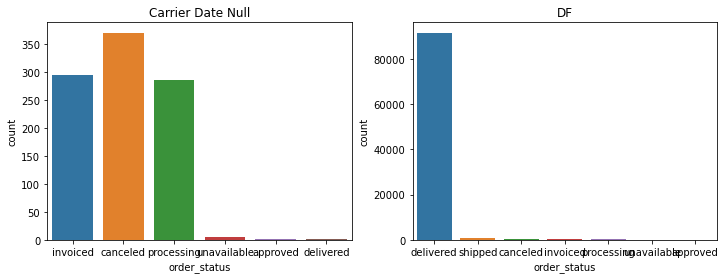

In [777]:
# 배송일자가 없는 데이터와 전체 데이터 order_status 건수 비교
f,ax = plt.subplots(1, 2, figsize = (12,4))

sns.countplot(data = temp, x = 'order_status', ax = ax[0])
ax[0].set_title('Carrier Date Null')

sns.countplot(data = df, x = 'order_status', ax = ax[1])
ax[1].set_title('DF')

Text(0.5, 1.0, 'DF')

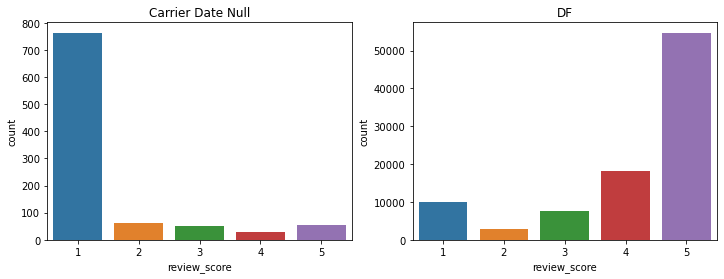

In [778]:
# 배송일자가 없는 데이터와 전체 데이터 review_score 건수 비교
f,ax = plt.subplots(1, 2, figsize = (12,4))

sns.countplot(data = temp, x = 'review_score', ax = ax[0])
ax[0].set_title('Carrier Date Null')

sns.countplot(data = df, x = 'review_score', ax = ax[1])
ax[1].set_title('DF')

# 배송일자가 없는 데이터는 취소되었거나 배송 진행중인 데이터가 대부분으로, review_score가 낮은 것으로 확인됨
# 해당 데이터를 제거하는 것은 부적절할 것으로 판단되며, 추후 배송소요일 등의 날짜 계산시 별도의 처리를 하기로 함

## ★불필요 컬럼 및 데이터 삭제

In [779]:
df.head(1)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,num,revenue,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0


In [780]:
df = df.drop(['product_id', 'shipping_limit_date', 'customer_id', 'order_approved_at', 'review_id', 'review_comment_title',
              'review_answer_timestamp', 'product_category_name', 'product_name_lenght', 'product_weight_g', 'product_length_cm',
              'product_height_cm', 'product_width_cm', 'product_category_name_english'], axis = 1)
df.head(1)

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0


In [781]:
df.isnull().sum()

order_id                         0    
seller_id                        0    
price                            0    
freight_value                    0    
num                              0    
revenue                          0    
order_status                     0    
order_purchase_timestamp         0    
order_delivered_carrier_date     959  
order_delivered_customer_date    2081 
order_estimated_delivery_date    0    
purchase_month                   0    
review_score                     0    
review_comment_message           55140
review_creation_date             0    
product_description_lenght       0    
product_photos_qty               0    
new_category                     0    
geolocation_state                0    
payment_sequential               1    
payment_installments             1    
boleto                           1    
credit_card                      1    
debit_card                       1    
not_defined                      1    
voucher                  

In [782]:
# 피쳐엔지니어링 주요 변수 계산에 필요한 order_delivered_customer_date, order_delivered_carrier_date이 null인 데이터 삭제
date_null_index = df.loc[(df['order_delivered_customer_date'].isnull()) | (df['order_delivered_carrier_date'].isnull()),
                         'order_id'].to_list()

In [783]:
df_notnull = df[~df['order_id'].isin(date_null_index)]
df_notnull

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06-28 11:52:20,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-06,5,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05-18 10:25:53,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05,4,carrinho muito bonito,2018-06-05 00:00:00,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,6f8c31653edb8c83e1a739408b5ff750,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08-01 18:38:42,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08,5,NaN,2017-08-10 00:00:00,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0
4,7d19f4ef4d04461989632411b7e588b9,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08-10 21:48:40,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08,5,NaN,2017-08-25 00:00:00,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07-13 20:04:05,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,2018-07,5,NaN,2018-07-24 00:00:00,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0
101562,ffee31fb4b5e35c9123608015637c495,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08-18 10:00:59,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00,2018-08,4,NaN,2018-08-22 00:00:00,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0
101563,fff7c4452f050315db1b3f24d9df5fcd,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06-01 16:53:03,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26 00:00:00,2017-06,5,NaN,2017-06-09 00:00:00,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0
101564,fffa82886406ccf10c7b4e35c4ff2788,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12-18 16:33:07,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24 00:00:00,2017-12,4,NaN,2018-01-09 00:00:00,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0


In [784]:
df_notnull.isnull().sum()

order_id                         0    
seller_id                        0    
price                            0    
freight_value                    0    
num                              0    
revenue                          0    
order_status                     0    
order_purchase_timestamp         0    
order_delivered_carrier_date     0    
order_delivered_customer_date    0    
order_estimated_delivery_date    0    
purchase_month                   0    
review_score                     0    
review_comment_message           54445
review_creation_date             0    
product_description_lenght       0    
product_photos_qty               0    
new_category                     0    
geolocation_state                0    
payment_sequential               1    
payment_installments             1    
boleto                           1    
credit_card                      1    
debit_card                       1    
not_defined                      1    
voucher                  

In [785]:
df_notnull = df_notnull[df_notnull['payment_sequential'].notna()]
df_notnull

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06-28 11:52:20,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,2017-06,5,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14 00:00:00,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05-18 10:25:53,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2018-05,4,carrinho muito bonito,2018-06-05 00:00:00,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0
3,6f8c31653edb8c83e1a739408b5ff750,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08-01 18:38:42,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,2017-08,5,NaN,2017-08-10 00:00:00,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0
4,7d19f4ef4d04461989632411b7e588b9,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08-10 21:48:40,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,2017-08,5,NaN,2017-08-25 00:00:00,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07-13 20:04:05,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07 00:00:00,2018-07,5,NaN,2018-07-24 00:00:00,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0
101562,ffee31fb4b5e35c9123608015637c495,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08-18 10:00:59,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23 00:00:00,2018-08,4,NaN,2018-08-22 00:00:00,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0
101563,fff7c4452f050315db1b3f24d9df5fcd,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06-01 16:53:03,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26 00:00:00,2017-06,5,NaN,2017-06-09 00:00:00,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0
101564,fffa82886406ccf10c7b4e35c4ff2788,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12-18 16:33:07,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24 00:00:00,2017-12,4,NaN,2018-01-09 00:00:00,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0


In [786]:
df_notnull.describe()

,price,freight_value,num,revenue,review_score,product_description_lenght,product_photos_qty,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
count,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.000000,91513.0,91513.000000
mean,126.827877,20.255753,1.099068,157.247271,4.171287,800.236873,2.262444,1.044376,2.890267,0.199731,0.772306,0.015309,0.0,0.056243
std,192.114133,15.845394,0.455151,217.798628,1.270913,657.215672,1.750363,0.360104,2.680963,0.399800,0.426273,0.122870,0.0,0.398023
min,0.850000,0.000000,1.000000,9.590000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,42.000000,13.370000,1.000000,60.980000,4.000000,353.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,79.490000,16.420000,1.000000,102.880000,5.000000,614.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.0,0.000000
75%,139.930000,21.260000,1.000000,173.230000,5.000000,1002.000000,3.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.0,0.000000
max,6735.000000,409.680000,20.000000,13664.080000,5.000000,3992.000000,20.000000,26.000000,24.000000,1.000000,2.000000,2.000000,0.0,25.000000


In [787]:
df_notnull.describe(include = 'O')

,order_id,seller_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_comment_message,review_creation_date,new_category,geolocation_state
count,91513,91513,91513,91513,91513,91513,91513,91513,37068,91513,91513,91513
unique,91513,2882,2,91154,76238,90782,444,22,32792,626,21,21
top,0a5d7e24850c68bf00d39bd62a9a45ee,6560211a19b47992c3666cc44a7e94c0,delivered,2018-08-02 12:06:07,2018-05-09 15:48:00,2018-05-08 23:38:46,2018-05-29 00:00:00,2017-11,Muito bom,2018-08-28 00:00:00,stationery,SP
freq,1,1676,91508,3,47,3,479,6874,217,430,15737,64190


## 날짜관련 컬럼

### dtype 수정

In [788]:
df = df_notnull.copy()

In [789]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91513 entries, 0 to 101565
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       91513 non-null  object 
 1   seller_id                      91513 non-null  object 
 2   price                          91513 non-null  float64
 3   freight_value                  91513 non-null  float64
 4   num                            91513 non-null  float64
 5   revenue                        91513 non-null  float64
 6   order_status                   91513 non-null  object 
 7   order_purchase_timestamp       91513 non-null  object 
 8   order_delivered_carrier_date   91513 non-null  object 
 9   order_delivered_customer_date  91513 non-null  object 
 10  order_estimated_delivery_date  91513 non-null  object 
 11  purchase_month                 91513 non-null  object 
 12  review_score                   91513 non-null

In [790]:
# 날짜 관련 컬럼 datetime 타입으로 변환
df.loc[:, 'order_purchase_timestamp':'order_estimated_delivery_date'] = df.loc[:, 'order_purchase_timestamp':'order_estimated_delivery_date'].apply(pd.to_datetime)
df.loc[:, 'review_creation_date'] = df.loc[:, 'review_creation_date'].apply(pd.to_datetime)

In [791]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91513 entries, 0 to 101565
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91513 non-null  object        
 1   seller_id                      91513 non-null  object        
 2   price                          91513 non-null  float64       
 3   freight_value                  91513 non-null  float64       
 4   num                            91513 non-null  float64       
 5   revenue                        91513 non-null  float64       
 6   order_status                   91513 non-null  object        
 7   order_purchase_timestamp       91513 non-null  datetime64[ns]
 8   order_delivered_carrier_date   91513 non-null  datetime64[ns]
 9   order_delivered_customer_date  91513 non-null  datetime64[ns]
 10  order_estimated_delivery_date  91513 non-null  datetime64[ns]
 11  purchase_month

### ★ 'delay', 'avg_delivery', 'preparation', 'review_date' 컬럼 생성

- delay : 배달 지연일수 (완료일 - 예정일)
- avg_delivery : 평균 배송일수 (완료일 - 주문일)
- preparation : 제품 준비기간 (발송일 - 주문일)
- review_date : 리뷰 작성에 걸린 기간 (리뷰 작성일 - 완료일)

In [792]:
df['delay'] =  (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
df['avg_delivery'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['preparation'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days
df['review_date'] = (df['review_creation_date'] - df['order_delivered_customer_date']).dt.days

In [793]:
df['review_date'].unique()

array([   0,   -5,   -9,    2,   -1,   -6,   -2,   -3,    1,   -4,  -11,
         10,  -15,  -19,   -8,  -20,    7,  -21,    3,  -12,    4,  -16,
        -18,    8,   -7,   13,  -13,    5,  -45,    6,   17,  -14,  -10,
        -30,  -28,   14,   22,  -27,  -37,  -22,  -17,  -26,  -25,  -51,
        -64,  -23,  -48,  -59,  -58,   12,  -32, -152,  -34, -175,   38,
        -36,  -65,  -31,   11,    9,  -73,  -49,   50,  -66, -143,   21,
       -144,   16,   15,  -24,  -50,  -76,   20,   18,  -40,  -43,   24,
        -42,  -84,  -39,   19,  -33,  -78,  -57,  -56,  -77,  -41,  -71,
         23,  -35,   26, -130, -105,  -44,  -54,  -62,  -29, -187, -112,
         47,  -61, -168, -131,  -38, -120, -139,  -52,  -53,  -46,  -92,
       -103,  -69, -137,  -47, -102,  -95,  -55, -150,   44,  -93,  -96,
       -159, -109,  -85,   28,   55,  -80, -125,   31,   48,  -72,   52,
         27, -165,  -74, -138, -164,   43,  -82,   29, -117, -160,   32,
       -104, -174, -132,   25,   59,   45,   66,  -

<AxesSubplot:xlabel='review_date', ylabel='Density'>

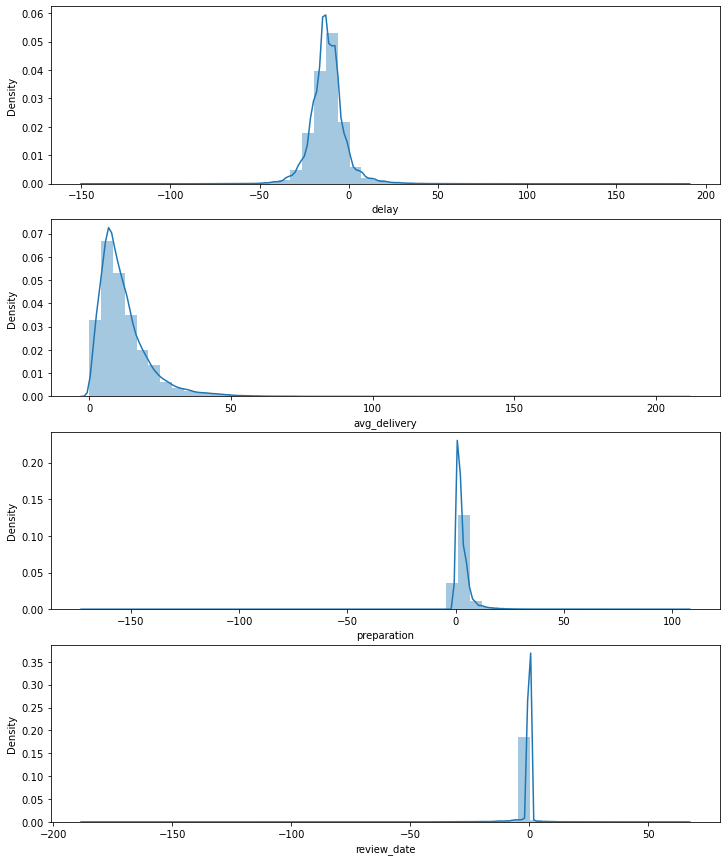

In [794]:
# 새로 생성한 변수 분포 distplot으로 확인
f,ax = plt.subplots(4, 1, figsize = (12,15))

sns.distplot(df['delay'], ax=ax[0])
sns.distplot(df['avg_delivery'], ax=ax[1])
sns.distplot(df['preparation'], ax=ax[2])
sns.distplot(df['review_date'], ax=ax[3])

In [795]:
# 배달 지연일수 (완료일 - 예정일)
# 147일 일찍 도착 ~ 188일 지연 사이에 분포, 평균적으로 11.8일 일찍 도착함
df['delay'].min(), df['delay'].max(), round(df['delay'].mean(),1)

(-147, 188, -11.8)

In [796]:
# 100일+ 빨리 도착한 특이 데이터 확인
# 예정일이 너무 늦은 시점으로 잡혀있었던 경우로 확인됨
df[df['delay'] < -100]

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date
28845,0607f0efea4b566f1eb8f7d3c2397320,903037660cf848a717166eb7a06d616e,62.99,10.09,2.0,146.16,delivered,2018-03-06 09:47:07,2018-03-07 21:33:39,2018-03-09 23:36:47,2018-08-03,2018-03,5,NaN,2018-03-10,229.0,1.0,furniture,SP,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-147,3,1,0
73453,40dc2ba6f322a17626aac6244332828c,1354d51653f645349064725ed204e85e,40.00,14.10,1.0,54.10,delivered,2017-10-05 21:39:05,2017-10-09 12:13:58,2017-10-13 13:49:07,2018-01-30,2017-10,5,NaN,2017-10-14,915.0,1.0,culture,SP,1.0,5.0,0.0,1.0,0.0,0.0,0.0,-109,7,3,0
94785,c2bb89b5c1dd978d507284be78a04cb2,7a241947449cc45dbfda4f9d0798d9d0,99.99,61.44,2.0,322.86,delivered,2017-05-23 22:28:36,2017-05-29 02:03:28,2017-06-09 13:35:54,2017-10-11,2017-05,5,NaN,2017-06-10,914.0,5.0,home_appliances,MG,1.0,15.0,0.0,1.0,0.0,0.0,0.0,-124,16,5,0
96654,c72727d29cde4cf870d569bf65edabfd,fce62094ffe6a4009188ec44e681dfdd,25.90,26.09,1.0,51.99,delivered,2017-02-07 18:01:15,2017-02-10 05:32:55,2017-02-14 14:27:45,2017-07-04,2017-02,5,NaN,2017-02-15,1044.0,1.0,others,SP,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-140,6,2,0
100255,eec7f369423b033e549c02f3c5381205,903037660cf848a717166eb7a06d616e,252.99,19.02,1.0,272.01,delivered,2018-02-06 20:44:56,2018-02-15 20:42:12,2018-02-27 16:35:43,2018-07-12,2018-02,3,Meu produto chegou quebrado não sei como proceder pois acredito que tenha sido quebrado durante o transporte dos correios,2018-02-28,192.0,1.0,furniture,SP,1.0,6.0,0.0,1.0,0.0,0.0,0.0,-135,20,8,0


In [797]:
# 평균 배송일수 (완료일 - 주문일)
# 0 ~ 209일 사이에 분포, 평균 12.1일 소요
df['avg_delivery'].min(), df['avg_delivery'].max(), round(df['avg_delivery'].mean(),1)

(0, 209, 12.1)

In [798]:
# 제품 준비기간 (발송일 - 주문일)
# 준비기간이 -인 이상치 발견
df['preparation'].min(), df['preparation'].max(), round(df['preparation'].mean(),1)

(-172, 107, 2.7)

In [799]:
# 이상치 확인
df[df['order_delivered_carrier_date'] < df['order_purchase_timestamp']]

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date
964,e0017093576ff7e25777c2d023eb1cd9,ea8482cd71df3c1969d7b9473ff13abc,21.99,15.25,1.0,37.24,delivered,2018-06-26 14:57:28,2018-06-26 14:50:00,2018-06-28 21:48:51,2018-08-01,2018-06,5,NaN,2018-06-29,540.0,4.0,telephone,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-34,2,-1,0
1770,71fecd3061e596fd59e65e9d62886535,ff063b022a9a0aab91bad2c9088760b7,93.00,47.09,1.0,140.09,delivered,2018-05-08 14:17:52,2018-05-08 13:43:00,2018-05-22 19:08:28,2018-06-12,2018-05,5,entrega antes d prazo,2018-05-23,422.0,7.0,furniture,SP,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-21,14,-1,0
2137,cab5ff5f1347330a7576a8aa80bd1774,dbc22125167c298ef99da25668e1011f,77.50,15.61,1.0,93.11,delivered,2018-06-27 11:57:41,2018-06-27 11:10:00,2018-07-02 15:03:45,2018-07-18,2018-06,5,Ótimo vendedor,2018-07-03,702.0,1.0,stationery,MG,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,5,-1,0
3781,9dafdbeb6a7b7240bc32fd6861c42f54,a1043bafd471dff536d0c462352beb48,109.99,24.71,1.0,134.70,delivered,2018-06-07 13:02:12,2018-06-07 12:02:00,2018-06-13 23:12:06,2018-07-05,2018-06,5,Recebi dentro do prazo.,2018-06-14,1893.0,1.0,electronics,MG,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-22,6,-1,0
4328,d454d6650d375ebc3f9667a4d2fe161c,850f4f8af5ea87287ac68de36e29107f,89.99,8.98,1.0,98.97,delivered,2018-05-10 09:12:16,2018-05-10 09:11:00,2018-05-11 18:58:28,2018-05-23,2018-05,3,ainda não recebi a compra.,2018-05-12,855.0,2.0,stationery,SP,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-12,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98108,d5b8231ec694904371f3efcd3450ee94,2a84855fd20af891be03bc5924d2b453,185.00,31.94,1.0,216.94,delivered,2018-06-06 14:58:22,2018-06-06 14:34:00,2018-06-14 01:38:35,2018-07-17,2018-06,4,NaN,2018-06-14,313.0,1.0,home_appliances,MG,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-33,7,-1,-1
99304,e300c76076c4b56031abe6f3ff54817f,0bebbb2cea103a4a020c95d43fd7d754,155.00,16.19,1.0,171.19,delivered,2018-08-15 10:59:22,2018-08-15 10:27:00,2018-08-21 17:21:15,2018-08-29,2018-08,5,NaN,2018-08-22,298.0,1.0,food_drink,SP,1.0,8.0,0.0,1.0,0.0,0.0,0.0,-8,6,-1,0
100182,ede6a833580744e002b0ee65323a3006,402916f742e5c740cc751493d9cf5053,100.00,18.80,2.0,237.60,delivered,2018-08-17 15:11:53,2018-08-17 14:07:00,2018-08-22 19:28:52,2018-09-12,2018-08,5,NaN,2018-08-23,2690.0,1.0,food_drink,MG,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-21,5,-1,0
100395,f0755c7d99a4a7f0bfa967f87d657855,0bae85eb84b9fb3bd773911e89288d54,69.81,19.68,1.0,89.49,delivered,2018-07-05 12:26:16,2018-07-05 12:23:00,2018-07-13 21:27:50,2018-08-02,2018-07,4,NaN,2018-07-14,218.0,4.0,construction,SC,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-20,8,-1,0


In [800]:
df.loc[df['order_delivered_carrier_date'] < df['order_purchase_timestamp'], 'preparation'].value_counts()

-1      156
-172    1  
-5      1  
Name: preparation, dtype: int64

In [801]:
# 시스템 오류인 데이터로 보이며, 정확한 분석을 위해 해당 데이터는 삭제
preparation_check_index = df.loc[(df['order_delivered_carrier_date'] < df['order_purchase_timestamp']), 'order_id'].to_list()

In [802]:
df = df[~df['order_id'].isin(preparation_check_index)]
df

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06-28 11:52:20,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,2017-06,5,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05-18 10:25:53,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2018-05,4,carrinho muito bonito,2018-06-05,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0
3,6f8c31653edb8c83e1a739408b5ff750,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08-01 18:38:42,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,2017-08,5,NaN,2017-08-10,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0
4,7d19f4ef4d04461989632411b7e588b9,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08-10 21:48:40,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,2017-08,5,NaN,2017-08-25,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07-13 20:04:05,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07,2018-07,5,NaN,2018-07-24,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-15,9,3,0
101562,ffee31fb4b5e35c9123608015637c495,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08-18 10:00:59,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23,2018-08,4,NaN,2018-08-22,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-2,3,2,0
101563,fff7c4452f050315db1b3f24d9df5fcd,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06-01 16:53:03,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26,2017-06,5,NaN,2017-06-09,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-18,6,0,0
101564,fffa82886406ccf10c7b4e35c4ff2788,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12-18 16:33:07,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24,2017-12,4,NaN,2018-01-09,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0,-16,21,2,0


<AxesSubplot:xlabel='review_date', ylabel='Density'>

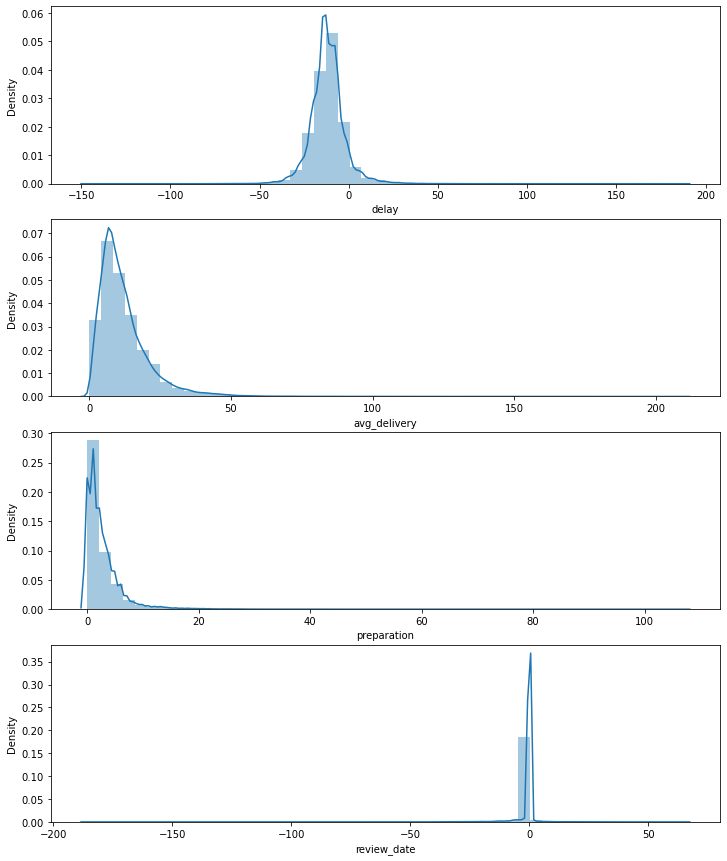

In [803]:
f,ax = plt.subplots(4, 1, figsize = (12,15))

sns.distplot(df['delay'], ax=ax[0])
sns.distplot(df['avg_delivery'], ax=ax[1])
sns.distplot(df['preparation'], ax=ax[2])
sns.distplot(df['review_date'], ax=ax[3])

### ★'error' 컬럼 만들기

In [804]:
# 완료일 - 예정일을 계산한 delay 컬럼값이 0 이상인 건은 배송예정일보다 늦게 도착한 건으로, review_score가 낮을 것으로 예상
df[df['delay'] > 0].review_score.value_counts()

1    3395
5    1033
3    689 
4    632 
2    543 
Name: review_score, dtype: int64

In [805]:
# 'error' 컬럼 만들어서 delay 컬럼값이 0보다 크거나 결측치인 경우 1로 표시, 나머지 데이터는 0으로 표시
df['error'] = 0
df.loc[(df['delay'] > 0) | (df['delay'].isnull()), 'error'] = 1
df.head()

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date,error
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0,0
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06-28 11:52:20,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,2017-06,5,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0,0
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05-18 10:25:53,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2018-05,4,carrinho muito bonito,2018-06-05,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0,0
3,6f8c31653edb8c83e1a739408b5ff750,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08-01 18:38:42,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,2017-08,5,NaN,2017-08-10,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0,0
4,7d19f4ef4d04461989632411b7e588b9,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08-10 21:48:40,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,2017-08,5,NaN,2017-08-25,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0,0


In [806]:
df['error'].value_counts()

0    85063
1    6292 
Name: error, dtype: int64

### ★ 'review_comment_count' 컬럼 만들기

In [825]:
df_full = df.copy()
df_full

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date,error
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0,0
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06-28 11:52:20,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,2017-06,5,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0,0
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05-18 10:25:53,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2018-05,4,carrinho muito bonito,2018-06-05,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0,0
3,6f8c31653edb8c83e1a739408b5ff750,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08-01 18:38:42,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,2017-08,5,NaN,2017-08-10,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0,0
4,7d19f4ef4d04461989632411b7e588b9,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08-10 21:48:40,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,2017-08,5,NaN,2017-08-25,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07-13 20:04:05,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07,2018-07,5,NaN,2018-07-24,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-15,9,3,0,0
101562,ffee31fb4b5e35c9123608015637c495,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08-18 10:00:59,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23,2018-08,4,NaN,2018-08-22,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-2,3,2,0,0
101563,fff7c4452f050315db1b3f24d9df5fcd,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06-01 16:53:03,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26,2017-06,5,NaN,2017-06-09,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-18,6,0,0,0
101564,fffa82886406ccf10c7b4e35c4ff2788,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12-18 16:33:07,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24,2017-12,4,NaN,2018-01-09,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0,-16,21,2,0,0


In [826]:
df_full.loc[df_full['review_comment_message'].isnull(), 'review_comment_message'] = 'c'

In [827]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91355 entries, 0 to 101565
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91355 non-null  object        
 1   seller_id                      91355 non-null  object        
 2   price                          91355 non-null  float64       
 3   freight_value                  91355 non-null  float64       
 4   num                            91355 non-null  float64       
 5   revenue                        91355 non-null  float64       
 6   order_status                   91355 non-null  object        
 7   order_purchase_timestamp       91355 non-null  datetime64[ns]
 8   order_delivered_carrier_date   91355 non-null  datetime64[ns]
 9   order_delivered_customer_date  91355 non-null  datetime64[ns]
 10  order_estimated_delivery_date  91355 non-null  datetime64[ns]
 11  purchase_month

In [828]:
df_full['review_comment_count'] = 0

In [829]:
df_full

,order_id,seller_id,price,freight_value,num,revenue,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,review_score,review_comment_message,review_creation_date,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date,error,review_comment_count
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09-13 08:59:02,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09,5,"Perfeito, produto entregue antes do combinado.",2017-09-21,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0,0,0
1,130898c0987d1801452a8ed92a670612,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06-28 11:52:20,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,2017-06,5,"lannister como sempre, entregou certinho e dentro do prazo. recomendo muito",2017-07-14,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0,0,0
2,532ed5e14e24ae1f0d735b91524b98b9,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05-18 10:25:53,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2018-05,4,carrinho muito bonito,2018-06-05,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0,0,0
3,6f8c31653edb8c83e1a739408b5ff750,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08-01 18:38:42,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,2017-08,5,c,2017-08-10,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0,0,0
4,7d19f4ef4d04461989632411b7e588b9,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08-10 21:48:40,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,2017-08,5,c,2017-08-25,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,ffebd80e3291e811c308365936897efd,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07-13 20:04:05,2018-07-17 10:03:00,2018-07-23 19:44:45,2018-08-07,2018-07,5,c,2018-07-24,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-15,9,3,0,0,0
101562,ffee31fb4b5e35c9123608015637c495,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08-18 10:00:59,2018-08-20 10:01:00,2018-08-21 12:18:57,2018-08-23,2018-08,4,c,2018-08-22,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-2,3,2,0,0,0
101563,fff7c4452f050315db1b3f24d9df5fcd,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06-01 16:53:03,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26,2017-06,5,c,2017-06-09,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-18,6,0,0,0,0
101564,fffa82886406ccf10c7b4e35c4ff2788,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12-18 16:33:07,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24,2017-12,4,c,2018-01-09,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0,-16,21,2,0,0,0


In [830]:
for i in range(0, df_full.shape[0]):
    df_full.iloc[i, 31] = len(df_full.iloc[i, 13])

<AxesSubplot:xlabel='review_score', ylabel='review_comment_count'>

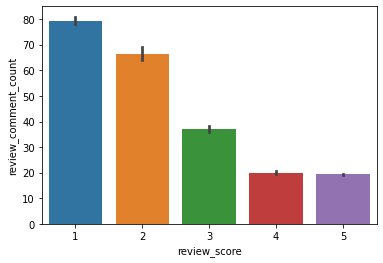

In [831]:
# review_score가 낮을수록 리뷰 코멘트 글자수가 많음
sns.barplot(data = df_full, x = 'review_score', y = 'review_comment_count')

### ★'freight_ratio' 컬럼 만들기

In [832]:
df_full['freight_ratio'] = df_full['freight_value'] / (df_full['price'] + df_full['freight_value'])

In [833]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91355 entries, 0 to 101565
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91355 non-null  object        
 1   seller_id                      91355 non-null  object        
 2   price                          91355 non-null  float64       
 3   freight_value                  91355 non-null  float64       
 4   num                            91355 non-null  float64       
 5   revenue                        91355 non-null  float64       
 6   order_status                   91355 non-null  object        
 7   order_purchase_timestamp       91355 non-null  datetime64[ns]
 8   order_delivered_carrier_date   91355 non-null  datetime64[ns]
 9   order_delivered_customer_date  91355 non-null  datetime64[ns]
 10  order_estimated_delivery_date  91355 non-null  datetime64[ns]
 11  purchase_month

In [835]:
df_full = df_full.drop(['order_id', 'order_purchase_timestamp', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                        'order_estimated_delivery_date', 'review_comment_message', 'review_creation_date'], axis = 1)
df_full

,seller_id,price,freight_value,num,revenue,order_status,purchase_month,review_score,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date,error,review_comment_count,freight_ratio
0,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09,5,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0,0,46,0.184098
1,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06,5,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0,0,75,0.243163
2,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05,4,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0,0,21,0.220233
3,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08,5,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0,0,1,0.215399
4,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08,5,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0,0,1,0.184098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07,5,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-15,9,3,0,0,1,0.282717
101562,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08,4,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-2,3,2,0,0,1,0.120156
101563,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06,5,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-18,6,0,0,0,1,0.027625
101564,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12,4,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0,-16,21,2,0,0,1,0.160704


## 데이터 최종 정리

### 분석기간 재설정

In [837]:
# 구매월별 매출건수 확인
df.groupby('purchase_month')['order_id'].count()

purchase_month
2016-10    255 
2016-12    1   
2017-01    707 
2017-02    1550
2017-03    2410
2017-04    2171
2017-05    3312
2017-06    2962
2017-07    3649
2017-08    3949
2017-09    3937
2017-10    4243
2017-11    6874
2017-12    5192
2018-01    6608
2018-02    6207
2018-03    6654
2018-04    6462
2018-05    6460
2018-06    5809
2018-07    5877
2018-08    6066
Name: order_id, dtype: int64

In [838]:
# 2016년 9월~12월과 2018년 9월 주문건수는 다른 월에 비해 현저히 낮음
# 서비스 테스트 등 다른 이슈가 있었던 기간이었을 가능성이 있다고 보고 해당 월은 분석에서 제외
df = df[~df['purchase_month'].isin(['2016-09', '2016-10', '2016-12', '2018-09'])]
df.groupby('purchase_month')['order_id'].count()

purchase_month
2017-01    707 
2017-02    1550
2017-03    2410
2017-04    2171
2017-05    3312
2017-06    2962
2017-07    3649
2017-08    3949
2017-09    3937
2017-10    4243
2017-11    6874
2017-12    5192
2018-01    6608
2018-02    6207
2018-03    6654
2018-04    6462
2018-05    6460
2018-06    5809
2018-07    5877
2018-08    6066
Name: order_id, dtype: int64

### review_score 분포 확인

<AxesSubplot:>

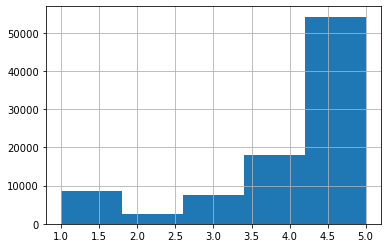

In [845]:
# 전체 review_score
df['review_score'].hist(bins = 5)

In [846]:
# 월별 review_score 평균
df_month = df.groupby('purchase_month')['review_score'].agg('mean').reset_index()
df_month

,purchase_month,review_score
0,2017-01,4.195191
1,2017-02,4.203226
2,2017-03,4.187137
3,2017-04,4.135421
4,2017-05,4.234903
5,2017-06,4.233964
6,2017-07,4.278706
7,2017-08,4.320081
8,2017-09,4.278385
9,2017-10,4.224841


<AxesSubplot:xlabel='purchase_month', ylabel='review_score'>

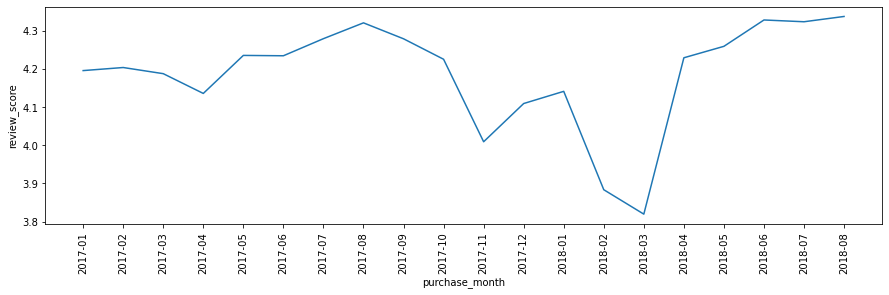

In [847]:
# 2017년 11월 ~ 2018년 3월에 review_score 평균이 상대적으로 낮았음을 확인
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 90)
sns.lineplot(data = df_month, x = 'purchase_month', y = 'review_score')

In [849]:
# 제품 카테고리별 review_score 평균
df_category = df.groupby('new_category')['review_score'].agg('mean').sort_values(ascending = False).reset_index()
df_category

,new_category,review_score
0,book,4.511140
1,food_drink,4.327922
2,pet,4.309833
3,beauty,4.246804
4,sports,4.238921
5,fashion,4.235078
6,culture,4.226141
7,garden_tools,4.221159
8,stationery,4.219755
9,home_appliances,4.216643


<AxesSubplot:xlabel='new_category', ylabel='review_score'>

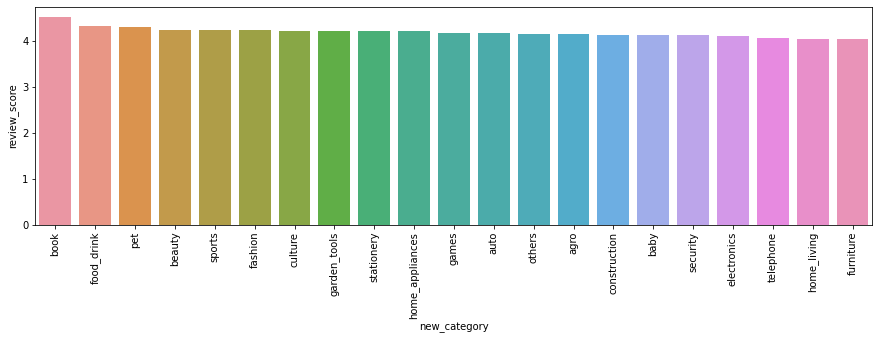

In [850]:
# 제품 카테고리별 review_score 평균에 일부 차이가 있음을 확인
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 90)
sns.barplot(data = df_category, x = 'new_category', y = 'review_score')

In [851]:
# 셀러별 review_score 평균
df_random_seller = df.groupby('seller_id')['review_score'].agg('mean').sort_values(ascending = False).reset_index().sample(20)
df_random_index = df_random_seller['seller_id'].tolist()

In [852]:
# 셀러 20명을 랜덤 추출하여 review_score 분포 확인
df_random = df.loc[df['seller_id'].isin(df_random_index), ['seller_id', 'review_score']].reset_index()
df_random

,index,seller_id,review_score
0,2157,23c38debaffe4a25a30fdbd9b586a13f,3
1,2158,23c38debaffe4a25a30fdbd9b586a13f,4
2,4081,86ccac0b835037332a596a33b6949ee1,5
3,12581,d05ae8f7a5bd1d2a690a44cd079e4e27,5
4,12582,d05ae8f7a5bd1d2a690a44cd079e4e27,4
...,...,...,...
495,100595,86ccac0b835037332a596a33b6949ee1,3
496,101189,0b35c634521043bf4b47e21547b99ab5,4
497,101231,0b35c634521043bf4b47e21547b99ab5,2
498,101271,bba3293d6f5d5af2f415e004e8b93ae3,5


<AxesSubplot:xlabel='seller_id', ylabel='review_score'>

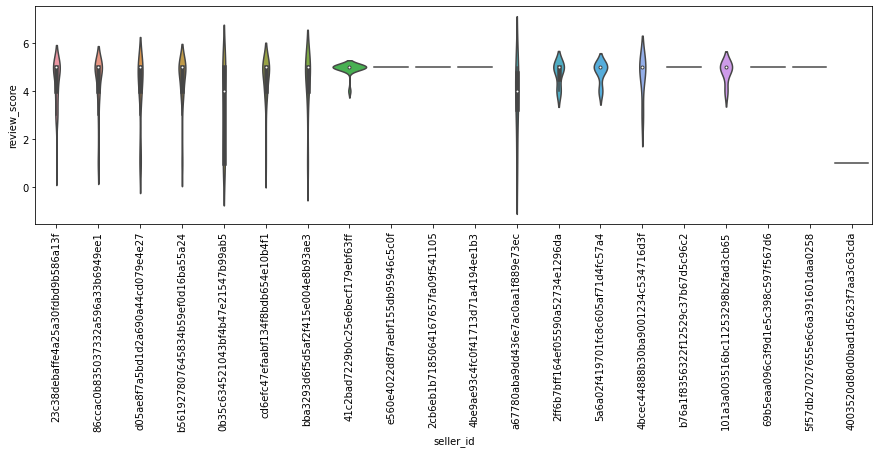

In [853]:
# 셀러마다 판매건수가 달라 review_score 분포도 다양한 형태로 나타남
plt.figure(figsize = (15, 4))
plt.xticks(rotation = 90)
sns.violinplot(data = df_random, x = 'seller_id', y = 'review_score')

In [854]:
# order_status별 review_score 평균
df_status = df.groupby('order_status')['review_score'].agg('mean').sort_values(ascending = False).reset_index()
df_status

,order_status,review_score
0,delivered,4.171573
1,canceled,3.000000


<AxesSubplot:xlabel='order_status', ylabel='review_score'>

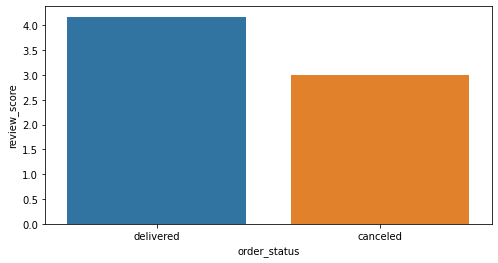

In [855]:
plt.figure(figsize = (8, 4))
sns.barplot(data = df_status, x = 'order_status', y = 'review_score')

In [856]:
# 판매건수는 São Paulo(SP)가 압도적으로 많음
df_city = df.groupby('geolocation_state')['review_score'].agg(['mean','count']).sort_values(by = 'count', ascending = False)
df_city

,mean,count
geolocation_state,,
SP,4.143489,63949
MG,4.256445,7331
PR,4.221849,7140
RJ,4.246696,4086
SC,4.217978,3560
RS,4.334235,1849
DF,4.101911,785
BA,4.193727,542
GO,4.394799,423


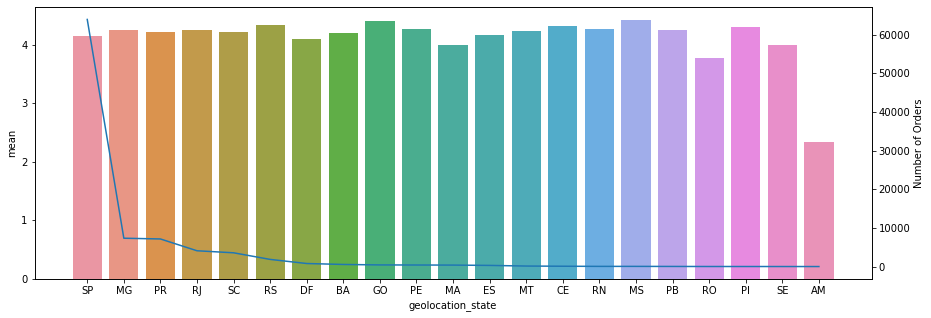

In [857]:
# state별로 평균 review_score의 평균이 다름을 확인할 수 있음
# 셀러가 Amazonas(AM) 주에 있는 경우 review_score 평균이 가장 낮음

fig, ax1 = plt.subplots(figsize = (15,5))
ax1.set_xlabel('State')
ax1.set_ylabel('Review Score')
ax1 = sns.barplot(x = df_city.index, y = 'mean', data = df_city)
ax1.tick_params(axis = 'y')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Orders')
ax2 = sns.lineplot(x = df_city.index, y = 'count', data = df_city, sort=False)
ax2.tick_params(axis = 'y')

plt.show()

# review_score 예측하는 모델 구축하기

## 연속형 변수와 목표변수 상관관계

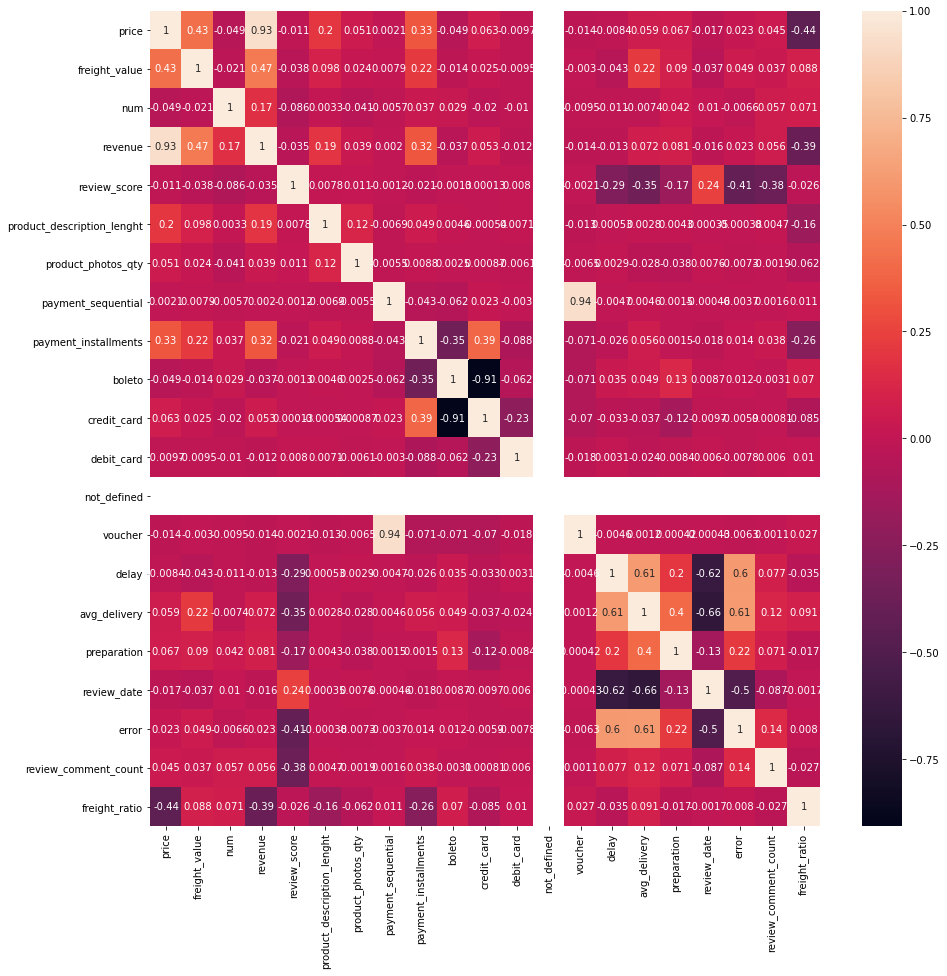

In [858]:
plt.figure(figsize = (15,15))
plt.yticks(rotation = 0)
g = sns.heatmap(df_full.corr(), annot = True)

## 전처리

In [862]:
df_full.columns

Index(['seller_id', 'price', 'freight_value', 'num', 'revenue', 'order_status',
       'purchase_month', 'review_score', 'product_description_lenght',
       'product_photos_qty', 'new_category', 'geolocation_state',
       'payment_sequential', 'payment_installments', 'boleto', 'credit_card',
       'debit_card', 'not_defined', 'voucher', 'delay', 'avg_delivery',
       'preparation', 'review_date', 'error', 'review_comment_count',
       'freight_ratio'],
      dtype='object')

In [944]:
df_ohe = df_full[['seller_id', 'price', 'freight_value', 'num', 'revenue', 'order_status',
       'purchase_month', 'review_score', 'product_description_lenght',
       'product_photos_qty', 'new_category', 'geolocation_state',
       'payment_sequential', 'payment_installments', 'boleto', 'credit_card',
       'debit_card', 'not_defined', 'voucher', 'delay', 'avg_delivery',
       'preparation', 'review_date', 'error', 'review_comment_count',
       'freight_ratio']]
df_ohe

,seller_id,price,freight_value,num,revenue,order_status,purchase_month,review_score,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date,error,review_comment_count,freight_ratio
0,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09,5,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0,0,46,0.184098
1,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06,5,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0,0,75,0.243163
2,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05,4,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0,0,21,0.220233
3,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08,5,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0,0,1,0.215399
4,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08,5,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0,0,1,0.184098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07,5,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-15,9,3,0,0,1,0.282717
101562,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08,4,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-2,3,2,0,0,1,0.120156
101563,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06,5,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-18,6,0,0,0,1,0.027625
101564,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12,4,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0,-16,21,2,0,0,1,0.160704


In [976]:
df_le = df_full[['seller_id', 'price', 'freight_value', 'num', 'revenue', 'order_status',
       'purchase_month', 'review_score', 'product_description_lenght',
       'product_photos_qty', 'new_category', 'geolocation_state',
       'payment_sequential', 'payment_installments', 'boleto', 'credit_card',
       'debit_card', 'not_defined', 'voucher', 'delay', 'avg_delivery',
       'preparation', 'review_date', 'error', 'review_comment_count',
       'freight_ratio']]
df_le

,seller_id,price,freight_value,num,revenue,order_status,purchase_month,review_score,product_description_lenght,product_photos_qty,new_category,geolocation_state,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher,delay,avg_delivery,preparation,review_date,error,review_comment_count,freight_ratio
0,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-09,5,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-9,7,6,0,0,46,0.184098
1,48436dade18ac8b2bce089ec2a041202,55.9,17.96,1.0,73.86,delivered,2017-06,5,598.0,4.0,stationery,RJ,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-13,15,7,0,0,75,0.243163
2,48436dade18ac8b2bce089ec2a041202,64.9,18.33,1.0,83.23,delivered,2018-05,4,598.0,4.0,stationery,RJ,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-3,17,5,0,0,21,0.220233
3,48436dade18ac8b2bce089ec2a041202,58.9,16.17,1.0,75.07,delivered,2017-08,5,598.0,4.0,stationery,RJ,1.0,3.0,0.0,1.0,0.0,0.0,0.0,-16,8,1,0,0,1,0.215399
4,48436dade18ac8b2bce089ec2a041202,58.9,13.29,1.0,72.19,delivered,2017-08,5,598.0,4.0,stationery,RJ,1.0,4.0,0.0,1.0,0.0,0.0,0.0,-8,13,0,0,0,1,0.184098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101561,d1c7fa84e48cfa21a0e595167c1c500e,129.9,51.20,1.0,181.10,delivered,2018-07,5,653.0,1.0,garden_tools,RS,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-15,9,3,0,0,1,0.282717
101562,0241d4d5d36f10f80c644447315af0bd,99.0,13.52,1.0,112.52,delivered,2018-08,4,308.0,1.0,furniture,PR,1.0,2.0,0.0,1.0,0.0,0.0,0.0,-2,3,2,0,0,1,0.120156
101563,7e93a43ef30c4f03f38b393420bc753a,736.0,20.91,1.0,756.91,delivered,2017-06,5,658.0,3.0,stationery,SP,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-18,6,0,0,0,1,0.027625
101564,8f2ce03f928b567e3d56181ae20ae952,229.9,44.02,1.0,273.92,delivered,2017-12,4,280.0,2.0,sports,SP,1.0,7.0,0.0,1.0,0.0,0.0,0.0,-16,21,2,0,0,1,0.160704


In [977]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le['seller_id'] = le.fit_transform(df_le['seller_id'])

In [978]:
# 목표변수
df_full_label = df_le['review_score']

In [979]:
# 입력변수 : LE
df_full_data = df_le.drop('review_score', axis = 1)

In [980]:
# 범주형, 연속형 변수 분리
cat_columns = [c for c, t in zip(df_full_data.dtypes.index, df_full_data.dtypes) if t == 'O']
num_columns = [c for c in df_full_data.columns if c not in cat_columns]
print('Categorical Columns:\n{}\n\n Numeric Columns:\n{}\n'.format(cat_columns, num_columns))

Categorical Columns:
['order_status', 'purchase_month', 'new_category', 'geolocation_state']

 Numeric Columns:
['seller_id', 'price', 'freight_value', 'num', 'revenue', 'product_description_lenght', 'product_photos_qty', 'payment_sequential', 'payment_installments', 'boleto', 'credit_card', 'debit_card', 'not_defined', 'voucher', 'delay', 'avg_delivery', 'preparation', 'review_date', 'error', 'review_comment_count', 'freight_ratio']



In [981]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_full_data, df_full_label, test_size=0.3,
                                                       random_state=2021,
                                                       shuffle=True)

x_train.shape, x_test.shape

((63948, 25), (27407, 25))

In [982]:
# 전처리함수
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def preprocess(x_train, x_test):
    tmp_x_train = x_train.copy()
    tmp_x_test  = x_test.copy()
    
    # reset index
    tmp_x_train = tmp_x_train.reset_index(drop=True)
    tmp_x_test  = tmp_x_test.reset_index(drop=True)
    
#     # num_columns 스케일링
#     scaler = StandardScaler()
#     tmp_x_train[num_columns] = scaler.fit_transform(tmp_x_train[num_columns])
#     tmp_x_test[num_columns] = scaler.transform(tmp_x_test[num_columns])
        
    # cat_columns 원핫인코딩
    ohe = OneHotEncoder(sparse=False)
    x_all = pd.concat([tmp_x_train[cat_columns], 
                       tmp_x_test[cat_columns]], axis=0)

    new_x_all = ohe.fit_transform(x_all)
    
    ohe_columns = []
    for cat in ohe.categories_:
        ohe_columns += cat.tolist()
    
    new_x_all = pd.DataFrame(new_x_all, columns=ohe_columns)

    new_x_train_cat = new_x_all.iloc[:tmp_x_train.shape[0], :]
    new_x_test_cat =  new_x_all.iloc[tmp_x_train.shape[0]:, :]

    new_x_train_cat = new_x_train_cat.reset_index(drop=True)
    new_x_test_cat  = new_x_test_cat.reset_index(drop=True)

    tmp_x_train = tmp_x_train.drop(columns=cat_columns)
    tmp_x_test  = tmp_x_test.drop(columns=cat_columns)

    tmp_x_train = pd.concat([tmp_x_train, new_x_train_cat], axis=1)
    tmp_x_test = pd.concat([tmp_x_test, new_x_test_cat], axis=1)
    
    return tmp_x_train, tmp_x_test

In [983]:
# 연속형 변수 처리x
x_train, x_test = preprocess(x_train, x_test)
x_train.shape, x_test.shape

((63948, 87), (27407, 87))

## 모델 결과

### seller_id 원핫인코딩, 연속형변수 전처리x

In [951]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

models = [['XGBoost', XGBRegressor(random_state=2021,
                                    n_jobs=4)], 
          ['LightGBM', LGBMRegressor(random_state=2021,
                                      n_jobs=4)]]

best_loss = np.inf

for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    current_loss_mae = mean_absolute_error(y_test, y_pred)
    current_loss_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
    if current_loss_rmse < best_loss:
        best_loss  = current_loss_rmse
        best_model = [i, name]
    
    print(f'{name} Model MAE : {current_loss_mae}')
    print(f'{name} Model RMSE: {current_loss_rmse}')

print(f'Best Model: {best_model[-1]}, RMSE: {best_loss}')

XGBoost Model MAE : 0.7935420302762186
XGBoost Model RMSE: 1.0457332407071844
LightGBM Model MAE : 0.7909419534962332
LightGBM Model RMSE: 1.037204927610761
Best Model: LightGBM, RMSE: 1.037204927610761


### seller_id 라벨인코딩, 연속형변수 전처리x

In [984]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

models = [['XGBoost', XGBRegressor(random_state=2021,
                                    n_jobs=-1)], 
          ['LightGBM', LGBMRegressor(random_state=2021,
                                      n_jobs=-1)]]

best_loss = np.inf

for i, (name, model) in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    current_loss_mae = mean_absolute_error(y_test, y_pred)
    current_loss_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            
    if current_loss_rmse < best_loss:
        best_loss  = current_loss_rmse
        best_model = [i, name]
    
    print(f'{name} Model MAE : {current_loss_mae}')
    print(f'{name} Model RMSE: {current_loss_rmse}')

print(f'Best Model: {best_model[-1]}, RMSE: {best_loss}')

XGBoost Model MAE : 0.7947839435227886
XGBoost Model RMSE: 1.0540422323637086
LightGBM Model MAE : 0.7944697140361137
LightGBM Model RMSE: 1.0407207920158517
Best Model: LightGBM, RMSE: 1.0407207920158517


# best model 확인

## feature importance

In [987]:
best_model = models[1][1]
best_model

LGBMRegressor(random_state=2021)

In [988]:
best_model.feature_importances_

array([241, 146, 178,  89, 140, 249,  78,   0,  63,  11,  14,   1,   0,
         2, 246, 263, 121, 117,   0, 493, 167,   0,   0,   0,   0,   0,
         2,   4,   1,  10,   6,   6,   9,   8,   0,   6,   7,   5,  16,
        20,   3,  14,   3,  10,   4,   3,   7,   4,  12,  21,   2,   1,
        22,   0,   0,  10,   0,  19,   2,  20,   1,   9,   3,   8,  23,
        15,   0,   0,   2,   5,   0,   5,   1,   4,   0,   0,   0,   0,
         0,   8,   5,   0,   0,   4,   4,   0,  27])

In [989]:
pd.DataFrame(sorted(zip(best_model.feature_importances_, x_train.columns), reverse=True), columns=['Value','Feature'])

,Value,Feature
0,493,review_comment_count
1,263,avg_delivery
2,249,product_description_lenght
3,246,delay
4,241,seller_id
...,...,...
82,0,AM
83,0,2017-10
84,0,2017-01
85,0,2016-12


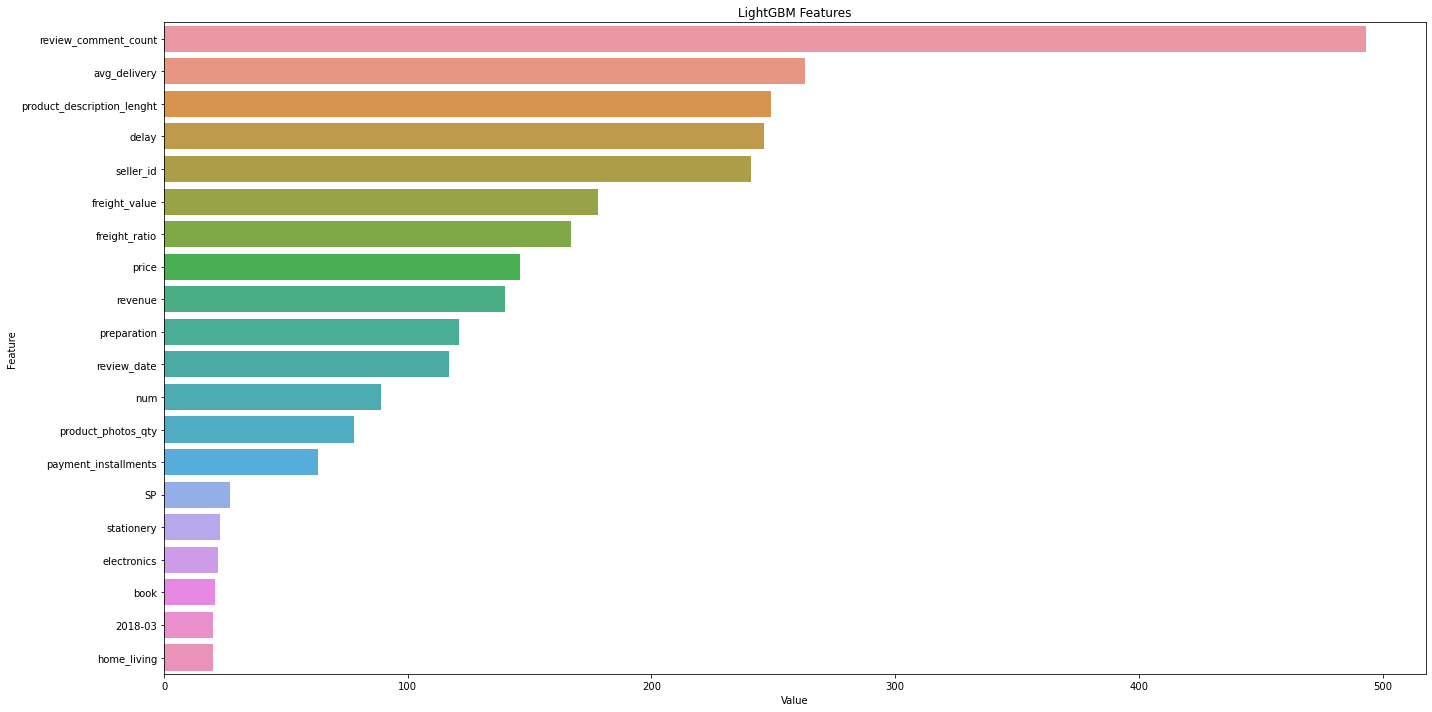

In [990]:
# Feature importance
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(best_model.feature_importances_,x_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

## permutation importance

In [991]:
from sklearn.inspection import permutation_importance

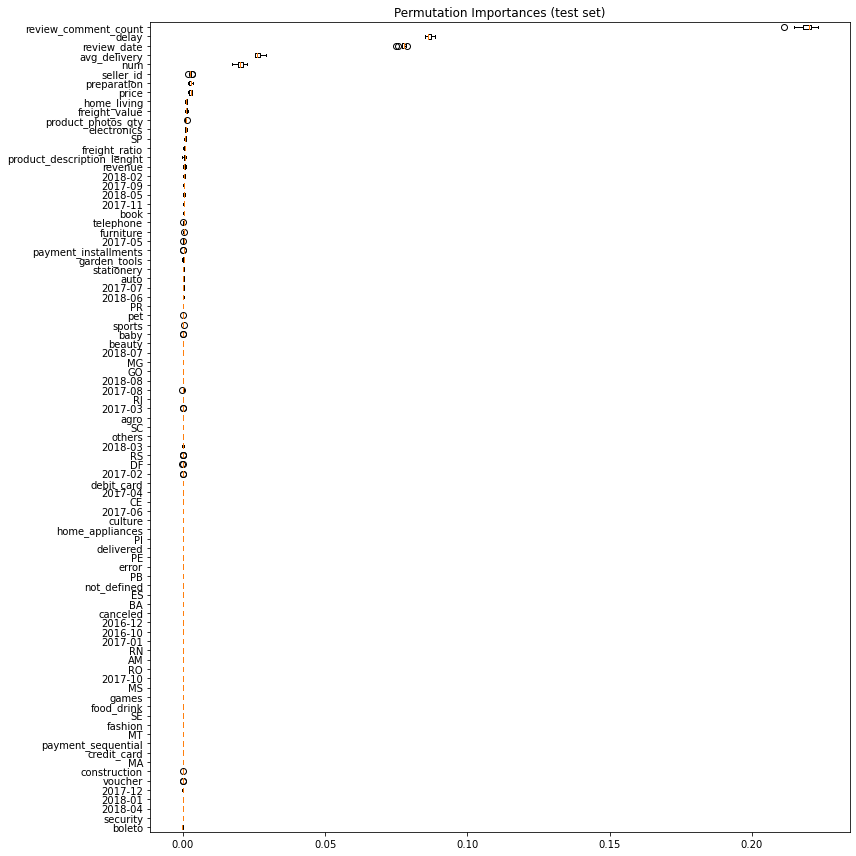

In [992]:
result = permutation_importance(best_model, x_test, y_test, n_repeats=10,
                                 n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12,12))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

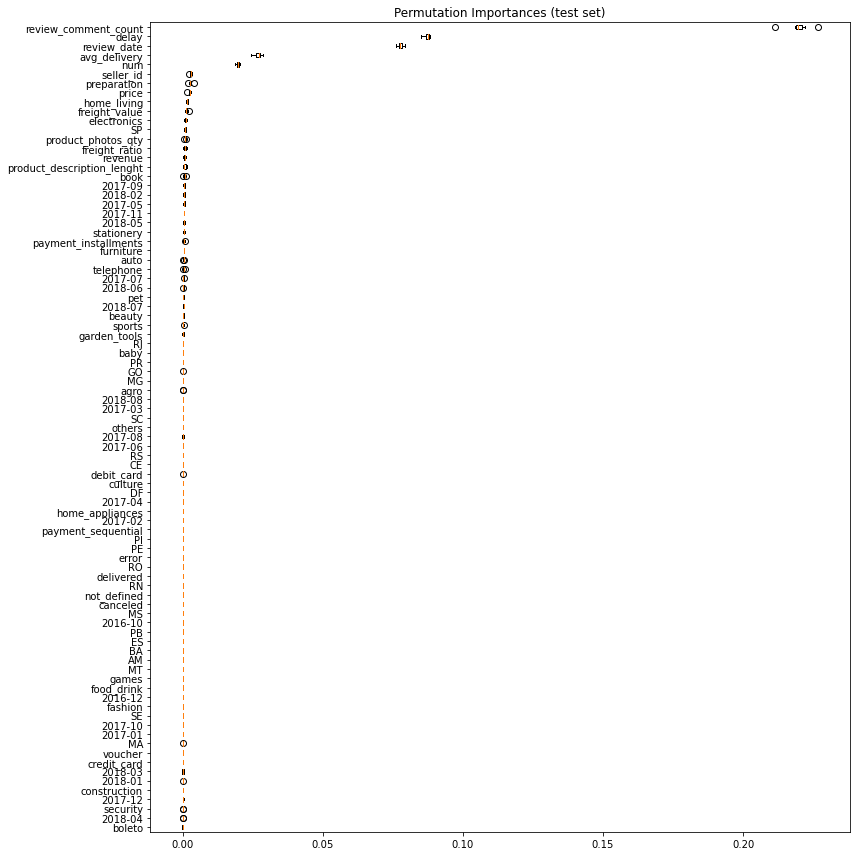

In [993]:
result = permutation_importance(best_model, x_test, y_test, n_repeats=10,
                                 n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize = (12,12))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=x_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

# Cross Validation

In [994]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=2021)

In [1000]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

val_scores = list()

kf = KFold(n_splits=5, shuffle=True, random_state=2021)

for i, (trn_idx, val_idx) in enumerate(kf.split(df_full_data, df_full_label)):
    x_train, y_train = df_full_data.iloc[trn_idx], df_full_label.iloc[trn_idx]
    x_test, y_test = df_full_data.iloc[val_idx], df_full_label.iloc[val_idx]
    
    # 전처리
    x_train, x_test = preprocess(x_train, x_test)
    
    # 모델 정의
    lgbm = LGBMRegressor(random_state=2021, n_jobs=-1)
    
    # 모델 학습
    lgbm.fit(x_train, y_train)
    y_pred = lgbm.predict(x_test)
    
    # 훈련, 검증 데이터 RMSE 확인
    trn_rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = lgbm.predict(x_train)))
    val_rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
    print('{} Fold, train rmse_score : {:.4f}, validation rmse_score : {:.4f}'.format(i, trn_rmse, val_rmse))
    
    val_scores.append(val_rmse)

# 교차 검증 rmse_score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold, train rmse_score : 0.9985, validation rmse_score : 1.0363
1 Fold, train rmse_score : 0.9977, validation rmse_score : 1.0420
2 Fold, train rmse_score : 0.9954, validation rmse_score : 1.0443
3 Fold, train rmse_score : 0.9994, validation rmse_score : 1.0333
4 Fold, train rmse_score : 0.9986, validation rmse_score : 1.0367
Cross Validation Score : 1.0385


In [1001]:
lgbm.feature_importances_

array([261, 141, 192,  97, 156, 224,  55,   0,  51,  15,  10,   5,   0,
         9, 233, 244, 122, 114,   0, 489, 178,   0,   0,   3,   0,   2,
         4,   3,   6,   6,   7,  10,   4,   9,   4,  14,   7,   3,  22,
        17,   7,  20,   7,   7,   4,   0,   6,   3,  13,  15,   9,   1,
        19,   3,   4,   9,   2,   9,   3,  25,   1,   5,   0,  12,  27,
         7,   0,   1,   0,  10,   0,   5,   0,   5,   0,   0,   0,   0,
         0,  10,   6,   0,   0,   6,   4,   0,  18])

In [1002]:
lgbm.max_depth

-1

In [1003]:
lgbm.learning_rate

0.1

In [1004]:
lgbm.n_estimators

100

# Hyperparameter Tuning

## GridSearch

In [1030]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {'n_estimators':[150, 200],
          'max_depth':[3, 4, 5],
         'learning_rate' : [0.04, 0.05, 0.06]}

lgbm_tuning = GridSearchCV(LGBMRegressor(random_state=2021), 
                   params, n_jobs= -1, scoring='neg_root_mean_squared_error')

In [1011]:
lgbm_tuning.fit(x_train, y_train)

GridSearchCV(estimator=LGBMRegressor(random_state=2021), n_jobs=-1,
             param_grid={'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [3, 4, 5], 'n_estimators': [150, 200]},
             scoring='neg_root_mean_squared_error')

In [1007]:
# 1차
# params = {'n_estimators':[50, 100, 150],
#           'max_depth':[2, 3, 4],
#          'learning_rate' : [0.01, 0.05, 0.1]}

print('GridSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning.best_score_, lgbm_tuning.best_params_))

GridSearchCV best mse score : 1.0428, best_params : {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 150}


In [1012]:
# 2차
# params = {'n_estimators':[150, 200],
#           'max_depth':[3, 4, 5],
#          'learning_rate' : [0.04, 0.05, 0.06]}
print('GridSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning.best_score_, lgbm_tuning.best_params_))

GridSearchCV best mse score : 1.0426, best_params : {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [1013]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

val_scores = list()

kf = KFold(n_splits=5, shuffle=True, random_state=2021)

for i, (trn_idx, val_idx) in enumerate(kf.split(df_full_data, df_full_label)):
    x_train, y_train = df_full_data.iloc[trn_idx], df_full_label.iloc[trn_idx]
    x_test, y_test = df_full_data.iloc[val_idx], df_full_label.iloc[val_idx]
    
    # 전처리
    x_train, x_test = preprocess(x_train, x_test)
    
    # 모델 정의
    lgbm = LGBMRegressor(random_state=2021, n_jobs=-1, learning_rate = 0.05, max_depth = 4, n_estimators = 200)
    
    # 모델 학습
    lgbm.fit(x_train, y_train)
    y_pred = lgbm.predict(x_test)
    
    # 훈련, 검증 데이터 RMSE 확인
    trn_rmse = np.sqrt(mean_squared_error(y_true = y_train, y_pred = lgbm.predict(x_train)))
    val_rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))
    print('{} Fold, train rmse_score : {:.4f}, validation rmse_score : {:.4f}'.format(i, trn_rmse, val_rmse))
    
    val_scores.append(val_rmse)

# 교차 검증 rmse_score 평균 계산하기
print('Cross Validation Score : {:.4f}'.format(np.mean(val_scores)))

0 Fold, train rmse_score : 1.0267, validation rmse_score : 1.0390
1 Fold, train rmse_score : 1.0254, validation rmse_score : 1.0441
2 Fold, train rmse_score : 1.0240, validation rmse_score : 1.0459
3 Fold, train rmse_score : 1.0274, validation rmse_score : 1.0350
4 Fold, train rmse_score : 1.0257, validation rmse_score : 1.0383
Cross Validation Score : 1.0405


## RandomizedSearch

In [1035]:
params = {'n_estimators':(50, 1000),
          'max_depth': [-1],
          'learning_rate' : (0.01, 0.1),
           'num_leaves': (100, 500)
}

lgbm_tuning_rs = RandomizedSearchCV(estimator=LGBMRegressor(random_state=2021), 
                                    n_jobs= -1, scoring='neg_root_mean_squared_error',
                                    param_distributions=params, cv = 5, verbose=1)

In [1036]:
lgbm_tuning_rs.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=2021), n_jobs=-1,
                   param_distributions={'learning_rate': (0.01, 0.1),
                                        'max_depth': [-1],
                                        'n_estimators': (50, 1000),
                                        'num_leaves': (100, 500)},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [1016]:
print('RanbdomSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning_rs.best_score_, lgbm_tuning_rs.best_params_))

RanbdomSearchCV best mse score : 1.0429, best_params : {'num_leaves': 100, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.07}


In [1019]:
print('RanbdomSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning_rs.best_score_, lgbm_tuning_rs.best_params_))

RanbdomSearchCV best mse score : 1.0429, best_params : {'num_leaves': 200, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.07}


In [1022]:
print('RanbdomSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning_rs.best_score_, lgbm_tuning_rs.best_params_))

RanbdomSearchCV best mse score : 1.0439, best_params : {'num_leaves': 50, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}


In [1025]:
print('RanbdomSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning_rs.best_score_, lgbm_tuning_rs.best_params_))

RanbdomSearchCV best mse score : 1.0430, best_params : {'num_leaves': 300, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.05}


In [1028]:
print('RanbdomSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning_rs.best_score_, lgbm_tuning_rs.best_params_))

RanbdomSearchCV best mse score : 1.0478, best_params : {'num_leaves': 500, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}


In [1037]:
print('RanbdomSearchCV best mse score : {:.4f}, best_params : {}'.format(-lgbm_tuning_rs.best_score_, lgbm_tuning_rs.best_params_))

RanbdomSearchCV best mse score : 1.0462, best_params : {'num_leaves': 100, 'n_estimators': 1000, 'max_depth': -1, 'learning_rate': 0.01}
